# Przedstawienie danych

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import sklearn
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from scipy import stats
from scipy.stats import iqr
from scipy.stats import ranksums
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.outliers_influence import variance_inflation_factor 


sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_frame = pd.read_excel("Inżynierka - ankieta (Odpowiedzi).xlsx")

In [3]:
data_frame = data_frame.drop('Sygnatura czasowa', axis=1)

polish_letters_to_english = str.maketrans('ęóąśłżźćń', 'eoaslzzcn')
numbers_to_questions = {}
number = 0

for col in data_frame.columns:
    if isinstance(data_frame[col].values[0], str):
        data_frame[col] = data_frame[col].str.lower()  #wszystko do lowercase
        data_frame[col] = data_frame[col].str.translate(polish_letters_to_english)  #zamiana polskich znakow
        data_frame[col] = data_frame[col].str.strip()  #usuniecie spacji
    numbers_to_questions[number] = col
    data_frame.rename(columns = {col:number}, inplace = True)  #numery zamiast pytan
    number += 1
    
#data_frame

In [4]:
df = data_frame.copy()
df_plot = df.copy()

Text(0.5, 0, 'Jesteś studentem czy pracownikiem Instytutu Informatyki?')

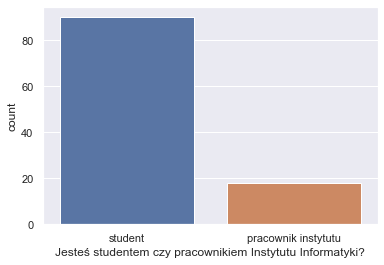

In [5]:
plot = sns.countplot(x=0, data=df)
plot.set_xlabel(numbers_to_questions[0])

0        1  
student  7+     31.111111
         1-2    26.666667
         3-4    25.555556
         5-6    16.666667
Name: 1, dtype: float64


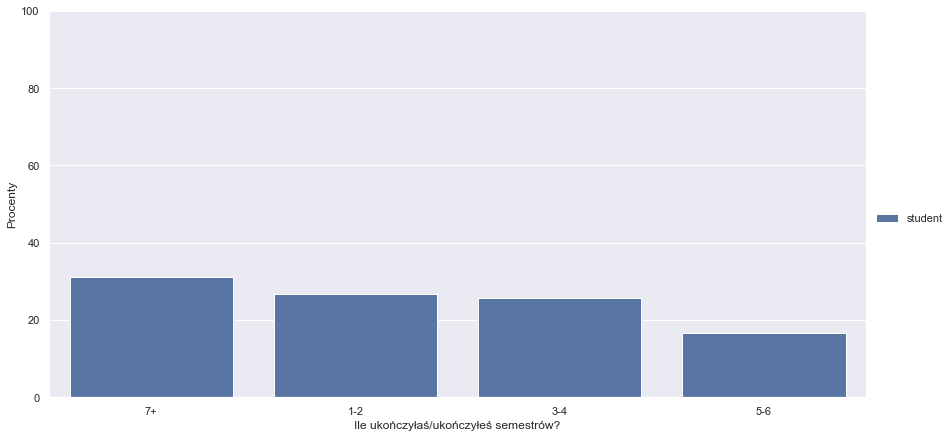

In [6]:
x = 1
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [7]:
keywords = ['joliot', 'curie', '15']
keywords_without_number = ['joliot', 'curie']
number = '15'

for row in df[2]:
    if all(keyword in row for keyword in keywords):
        df[2] = df[2].replace(row, 'joliot-curie 15')
        df_plot[2] = df_plot[2].replace(row, 'joliot-curie 15')
    elif all(keyword in row for keyword in keywords_without_number) and number not in row:
        df[2] = df[2].replace(row, 'joliot-curie')
        df_plot[2] = df_plot[2].replace(row, 'joliot-curie')
    else:
        df_plot[2] = df_plot[2].replace(row, 'nie wiem/inne')
        
        
#df[2].value_counts()

0                    2              
pracownik instytutu  joliot-curie 15    72.222222
                     nie wiem/inne      16.666667
                     joliot-curie       11.111111
student              nie wiem/inne      40.000000
                     joliot-curie       30.000000
                     joliot-curie 15    30.000000
Name: 2, dtype: float64


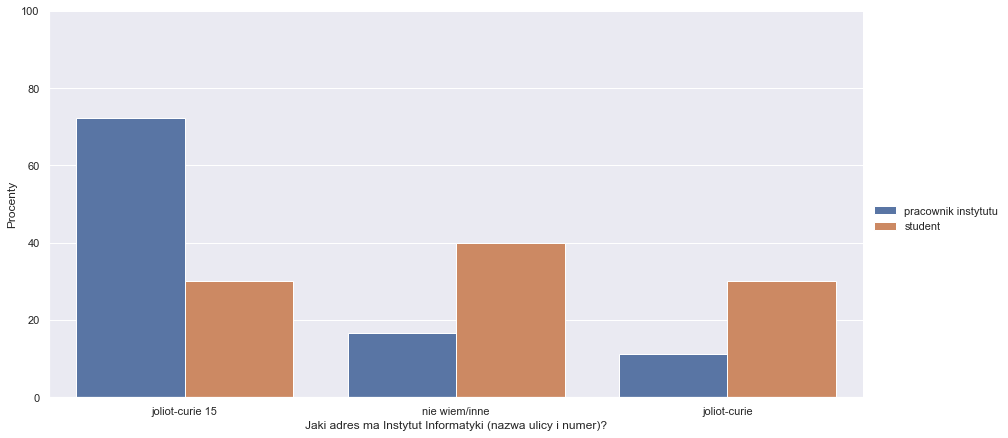

In [8]:
x = 2
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    3                
pracownik instytutu  lukasz piwowar       83.333333
                     marcin mlotkowski    11.111111
                     jakub kowalski        5.555556
student              lukasz piwowar       80.000000
                     wiktor zychla        10.000000
                     jakub kowalski        7.777778
                     marcin mlotkowski     2.222222
Name: 3, dtype: float64


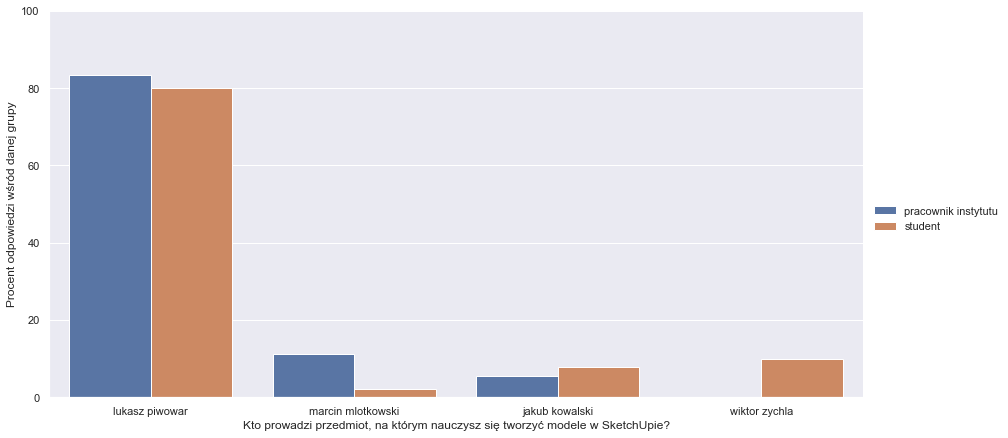

In [9]:
x = 3
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procent odpowiedzi wśród danej grupy').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procent odpowiedzi wśród danej grupy', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [10]:
keywords = ['wyspa', 'slodowa']

for row in df[4]:
    if any(keyword in row for keyword in keywords):
        df[4] = df[4].replace(row, 'wyspa slodowa')
        df_plot[4] = df_plot[4].replace(row, 'wyspa slodowa')
    else:
        df_plot[4] = df_plot[4].replace(row, 'nie wiem/inne')
        
#df[4].value_counts()

0                    4            
pracownik instytutu  wyspa slodowa    61.111111
                     nie wiem/inne    38.888889
student              wyspa slodowa    91.111111
                     nie wiem/inne     8.888889
Name: 4, dtype: float64


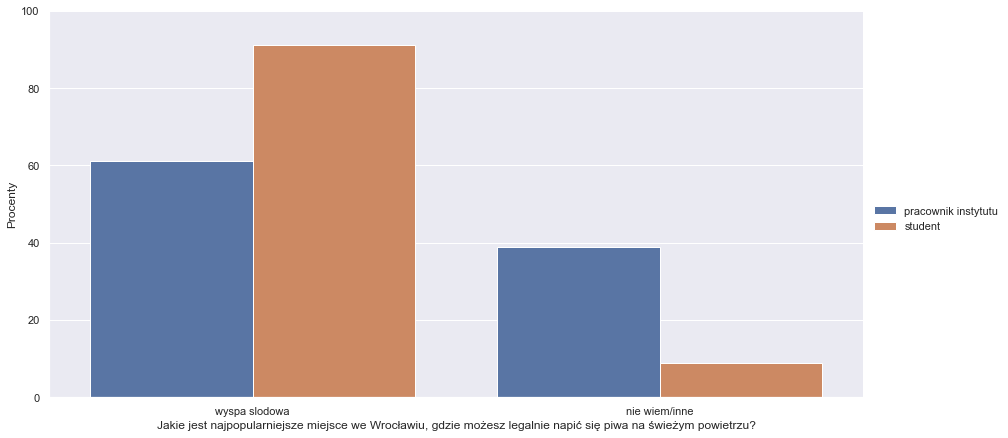

In [11]:
x = 4
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    5         
pracownik instytutu  rektor        94.444444
                     dziekan        5.555556
student              rektor        92.222222
                     dziekan        4.444444
                     dyrektor       2.222222
                     prodziekan     1.111111
Name: 5, dtype: float64


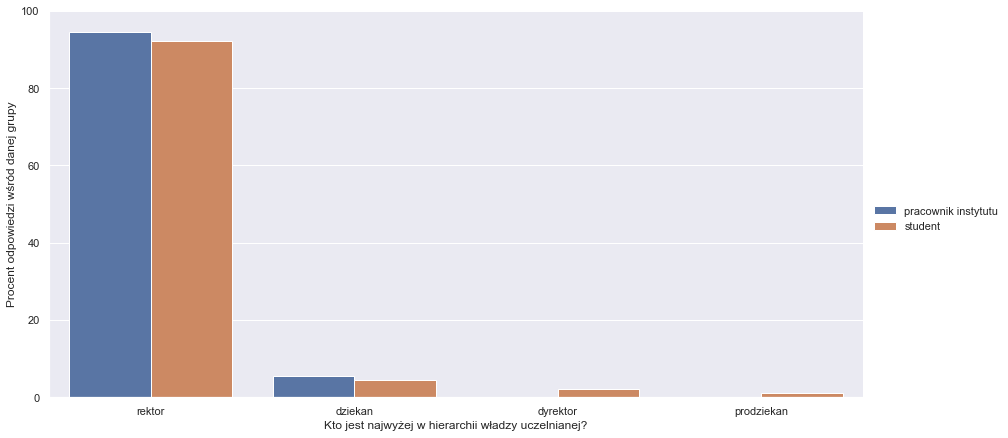

In [12]:
x = 5
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procent odpowiedzi wśród danej grupy').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procent odpowiedzi wśród danej grupy', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [13]:
keywords = ['indywidualne', 'studia', 'informatyczno', 'matematyczne']
keywords_incomplete_answer = ['indyw', 'studia', 'inf', 'mat']

for row in df[6]:
    if all(keyword in row for keyword in keywords):
        df[6] = df[6].replace(row, 'indywidualne studia informatyczno-matematyczne')
        df_plot[6] = df_plot[6].replace(row, 'indywidualne studia informatyczno-matematyczne')
    elif all(keyword in row for keyword in keywords_incomplete_answer):
        df[6] = df[6].replace(row, 'indywidualne studia inf-mat')  #literowki, skroty
        df_plot[6] = df_plot[6].replace(row, 'indywidualne studia inf-mat')
    else:
        df_plot[6] = df_plot[6].replace(row, 'nie wiem/inne')
        
#df_plot[6].value_counts()

0                    6                                             
pracownik instytutu  indywidualne studia informatyczno-matematyczne    66.666667
                     nie wiem/inne                                     27.777778
                     indywidualne studia inf-mat                        5.555556
student              indywidualne studia informatyczno-matematyczne    76.666667
                     indywidualne studia inf-mat                       13.333333
                     nie wiem/inne                                     10.000000
Name: 6, dtype: float64


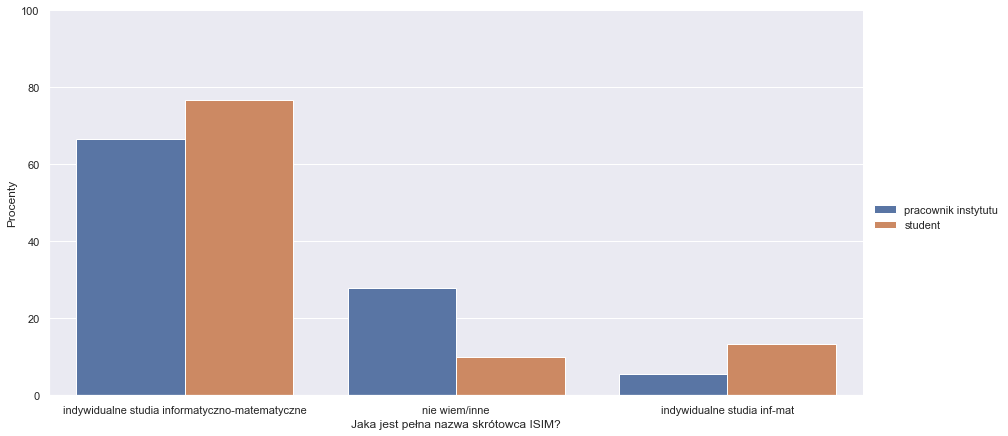

In [14]:
x = 6
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    7       
pracownik instytutu  zaklady     100.000000
student              zaklady      65.555556
                     wydzialy     17.777778
                     zespoly       8.888889
                     katedry       7.777778
Name: 7, dtype: float64


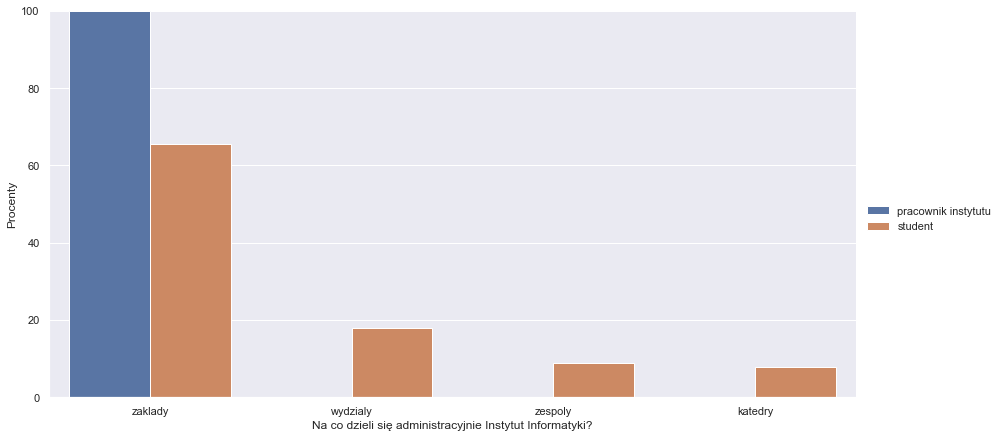

In [15]:
x = 7
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    8
pracownik instytutu  7    44.444444
                     6    38.888889
                     8    11.111111
                     9     5.555556
student              7    77.777778
                     6    11.111111
                     8    10.000000
                     9     1.111111
Name: 8, dtype: float64


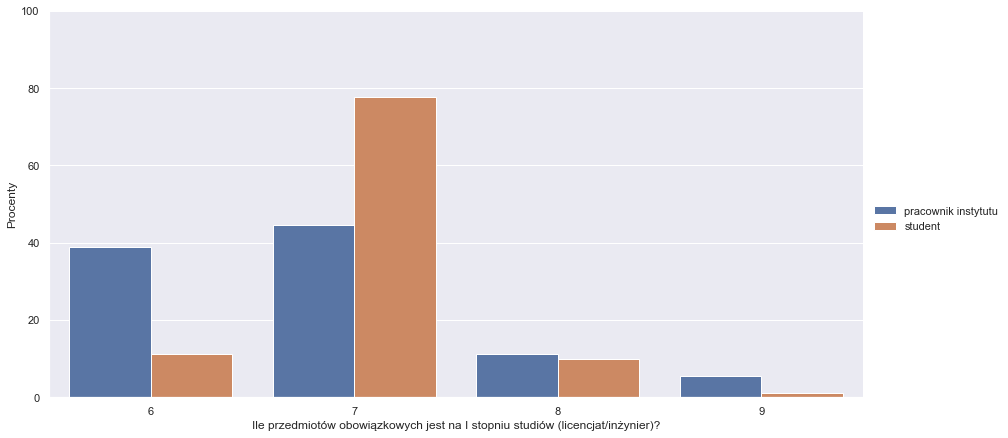

In [16]:
x = 8
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [17]:
keywords = ['syk', 'systemy komputerowe']

for row in df[9]:
    if any(keyword in row for keyword in keywords):
        df[9] = df[9].replace(row, 'syk (systemy komputerowe)')
        df_plot[9] = df_plot[9].replace(row, 'syk (systemy komputerowe)')
    else:
        df_plot[9] = df_plot[9].replace(row, 'nie wiem/inne')
        
#df[9].value_counts()

0                    9                        
pracownik instytutu  nie wiem/inne                55.555556
                     syk (systemy komputerowe)    44.444444
student              syk (systemy komputerowe)    80.000000
                     nie wiem/inne                20.000000
Name: 9, dtype: float64


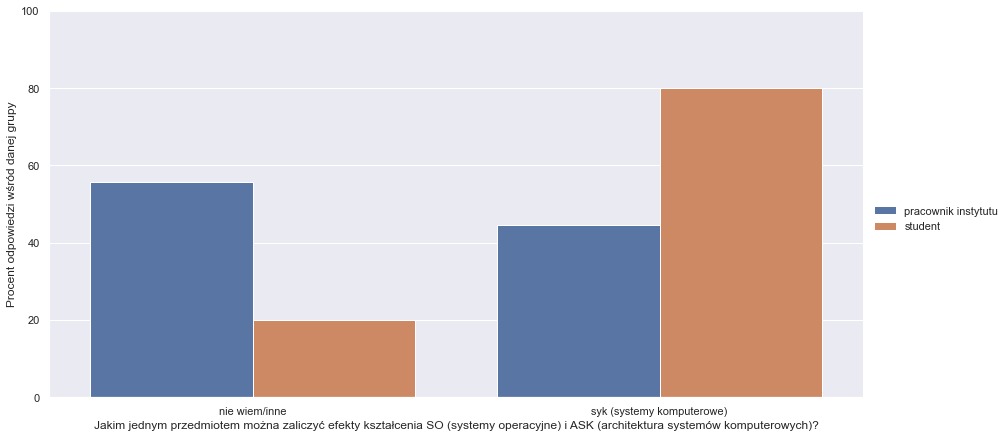

In [18]:
x = 9
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procent odpowiedzi wśród danej grupy').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procent odpowiedzi wśród danej grupy', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [19]:
keywords = ['zosia', 'zimowy oboz studentow informatyki', 'zoska']

for row in df[10]:
    if any(keyword in row for keyword in keywords):
        df[10] = df[10].replace(row, 'zosia (zimowy oboz studentow informatyki a)')
        df_plot[10] = df_plot[10].replace(row, 'zosia (zimowy oboz studentow informatyki a)')
    else:
        df_plot[10] = df_plot[10].replace(row, 'nie wiem/inne')
        
#df[10].value_counts()

0                    10                                         
pracownik instytutu  zosia (zimowy oboz studentow informatyki a)    100.000000
student              zosia (zimowy oboz studentow informatyki a)     95.555556
                     nie wiem/inne                                    4.444444
Name: 10, dtype: float64


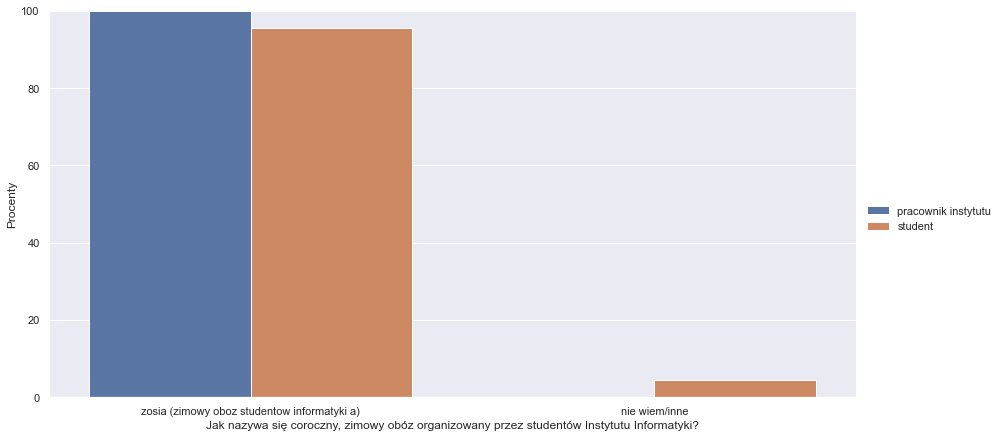

In [20]:
x = 10
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [21]:
keywords = ['grzyb', 'grzib', 'grzymbola']

for row in df[11]:
    if any(keyword in row for keyword in keywords):
        df[11] = df[11].replace(row, 'grzyba')
        df_plot[11] = df_plot[11].replace(row, 'grzyba')
    else:
        df_plot[11] = df_plot[11].replace(row, 'nie wiem/inne')
        
#df[11].value_counts()

0                    11           
pracownik instytutu  grzyba           94.444444
                     nie wiem/inne     5.555556
student              grzyba           96.666667
                     nie wiem/inne     3.333333
Name: 11, dtype: float64


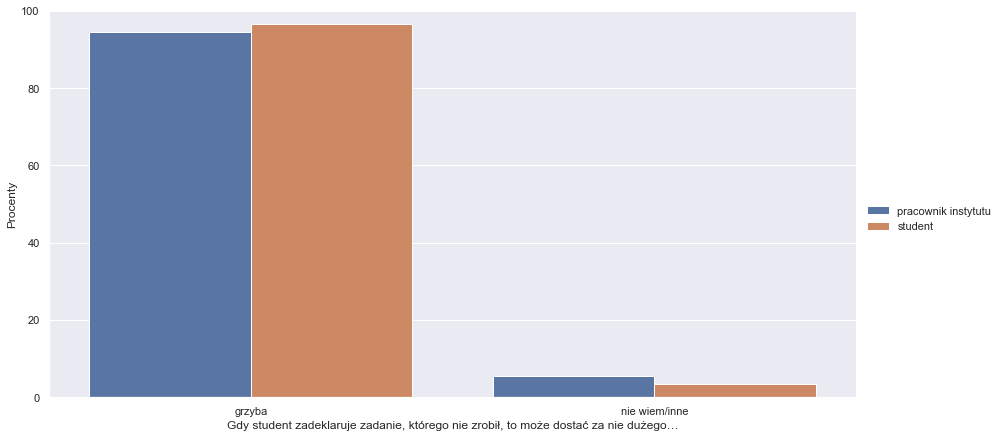

In [22]:
x = 11
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    12               
pracownik instytutu  oceny koncowe        55.555556
                     zaliczenia etapow    27.777778
                     semestry             11.111111
                     sprawdziany           5.555556
student              oceny koncowe        76.666667
                     zaliczenia etapow    16.666667
                     sprawdziany           5.555556
                     semestry              1.111111
Name: 12, dtype: float64


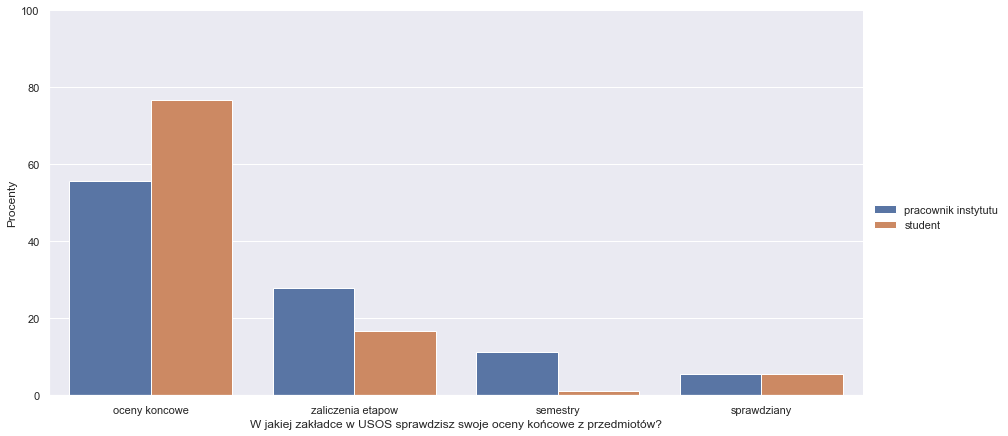

In [23]:
x = 12
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [24]:
keywords_aisd = ['aisd', 'algorytmy i struktury danych']
keywords_md = ['dyskretna', 'md']
keywords_an = ['analiza numeryczna', 'an', 'numerki']

for row in df[13]:
    if any(keyword in row for keyword in keywords_aisd) and any(keyword in row for keyword in keywords_md):
        df[13] = df[13].replace(row, 'aisd, md')
        df_plot[13] = df_plot[13].replace(row, 'aisd, md')
    elif any(keyword in row for keyword in keywords_an) and any(keyword in row for keyword in keywords_md):
        df[13] = df[13].replace(row, 'an, md')
        df_plot[13] = df_plot[13].replace(row, 'an, md')
    elif any(keyword in row for keyword in keywords_aisd) and any(keyword in row for keyword in keywords_an):
        df[13] = df[13].replace(row, 'aisd, an')
        df_plot[13] = df_plot[13].replace(row, 'aisd, an')
    else:
        df_plot[13] = df_plot[13].replace(row, 'nie wiem/inne')
        
#df[13].value_counts()

0                    13           
pracownik instytutu  aisd, md         61.111111
                     nie wiem/inne    22.222222
                     aisd, an         11.111111
                     an, md            5.555556
student              an, md           45.555556
                     aisd, md         34.444444
                     nie wiem/inne    14.444444
                     aisd, an          5.555556
Name: 13, dtype: float64


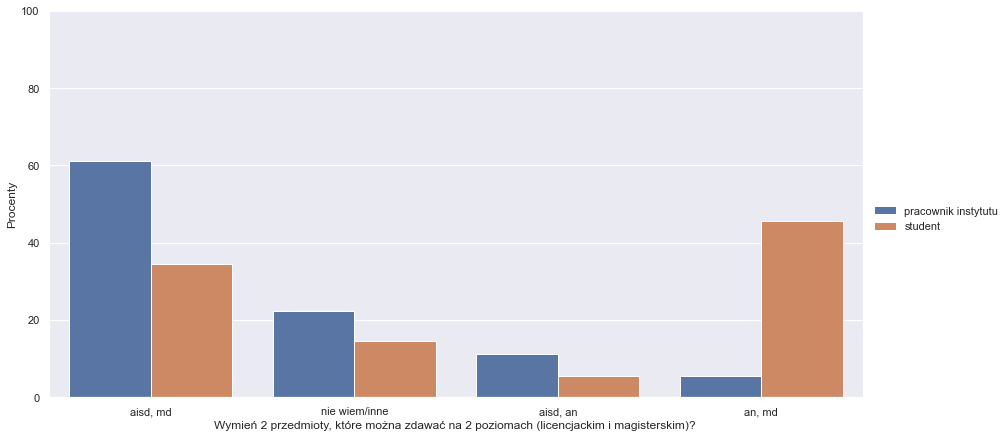

In [25]:
x = 13
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [26]:
keywords = ['dziennikarstwo', 'dziennikarstwa', 'dziennikarze', 'dziennikarski',
            'idziks', 'dzi*nnikarstwo', 'dziennnikarstwo', 'dzienmikarstwo']


for row in df[14]:
    if any(keyword in row for keyword in keywords):
        df[14] = df[14].replace(row, 'dziennikarstwa')
        df_plot[14] = df_plot[14].replace(row, 'dziennikarstwa')
    else:
        df_plot[14] = df_plot[14].replace(row, 'nie wiem/inne')
        
#df[14].value_counts()

0                    14            
pracownik instytutu  dziennikarstwa    100.000000
student              dziennikarstwa     92.222222
                     nie wiem/inne       7.777778
Name: 14, dtype: float64


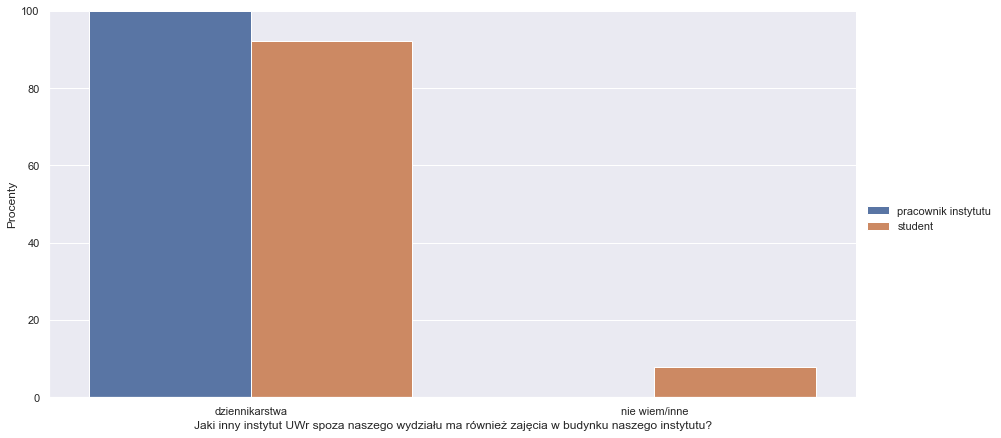

In [27]:
x = 14
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    15
pracownik instytutu  50    38.888889
                     20    33.333333
                     30    16.666667
                     10    11.111111
student              20    66.666667
                     50    16.666667
                     10    10.000000
                     30     6.666667
Name: 15, dtype: float64


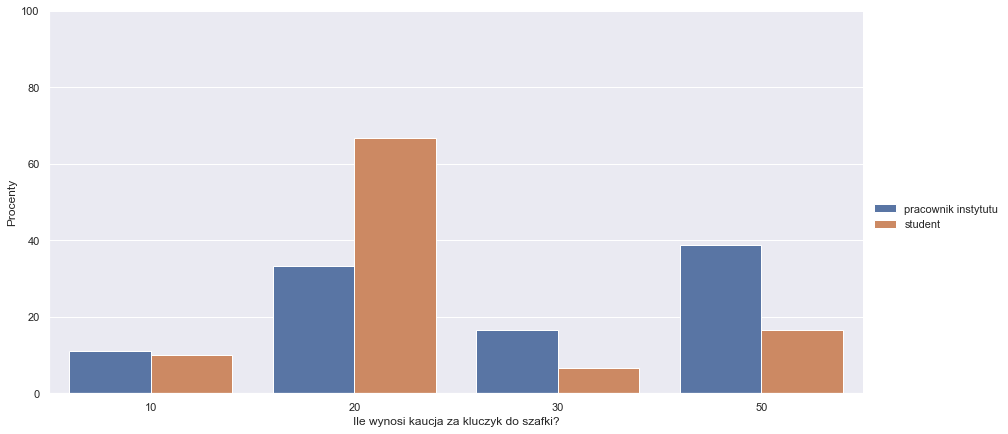

In [28]:
x = 15
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    16 
pracownik instytutu  100    50.000000
                     50     44.444444
                     200     5.555556
student              100    66.666667
                     50     23.333333
                     200     8.888889
                     20      1.111111
Name: 16, dtype: float64


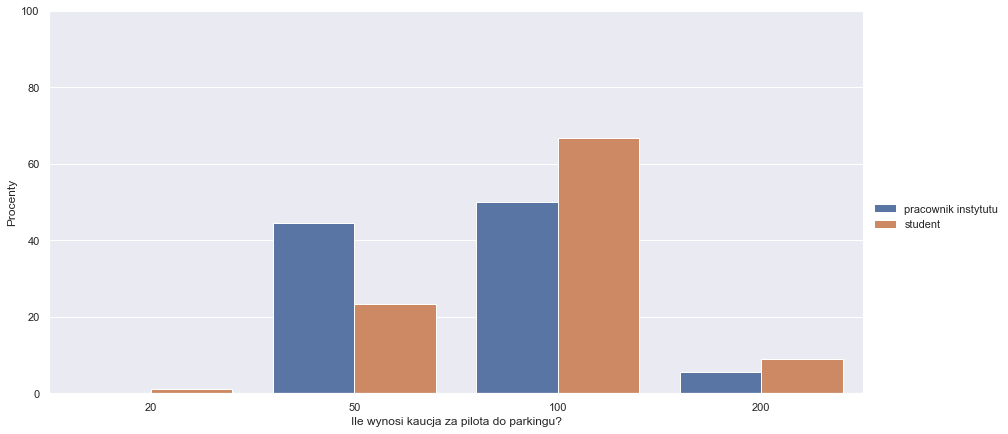

In [29]:
x = 16
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [30]:
keywords = ['aisd', 'algorytmy i struktury danych', 'aids', 'algortymy i struktury danych']


for row in df[17]:
    if any(keyword in row for keyword in keywords):
        df[17] = df[17].replace(row, 'aisd')
        df_plot[17] = df_plot[17].replace(row, 'aisd')
    else:
        df_plot[17] = df_plot[17].replace(row, 'nie wiem/inne')
        
#df[17].value_counts()

0                    17           
pracownik instytutu  aisd             77.777778
                     nie wiem/inne    22.222222
student              aisd             94.444444
                     nie wiem/inne     5.555556
Name: 17, dtype: float64


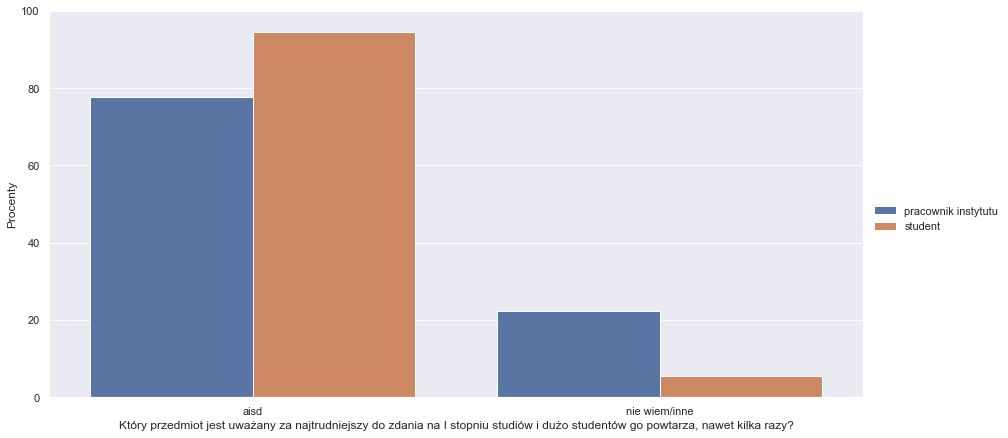

In [31]:
x = 17
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    18
pracownik instytutu  4     61.111111
                     5     38.888889
student              4     74.444444
                     5     17.777778
                     6      4.444444
                     3      3.333333
Name: 18, dtype: float64


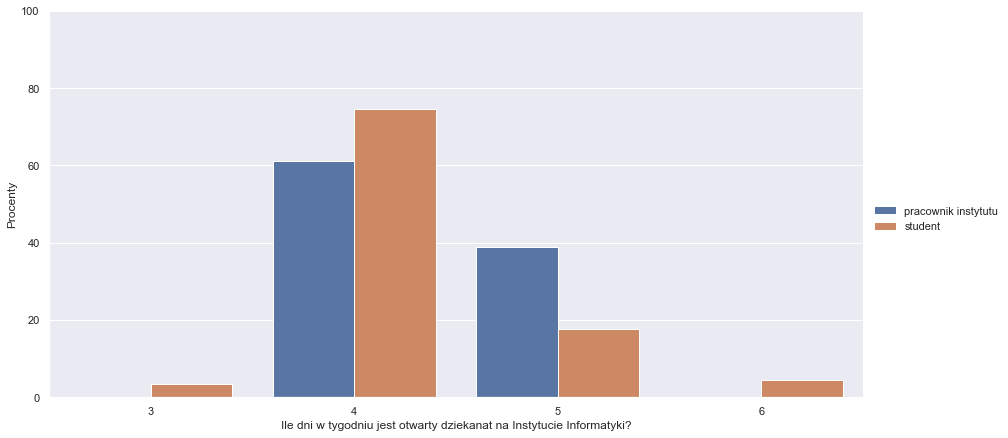

In [32]:
x = 18
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [33]:
keywords = ['polaka']


for row in df[19]:
    if any(keyword in row for keyword in keywords):
        df[19] = df[19].replace(row, 'benedykta polaka')
        df_plot[19] = df_plot[19].replace(row, 'benedykta polaka')
    else:
        df_plot[19] = df_plot[19].replace(row, 'nie wiem/inne')
        
#df_plot[19].value_counts()

0                    19              
pracownik instytutu  benedykta polaka    66.666667
                     nie wiem/inne       33.333333
student              nie wiem/inne       73.333333
                     benedykta polaka    26.666667
Name: 19, dtype: float64


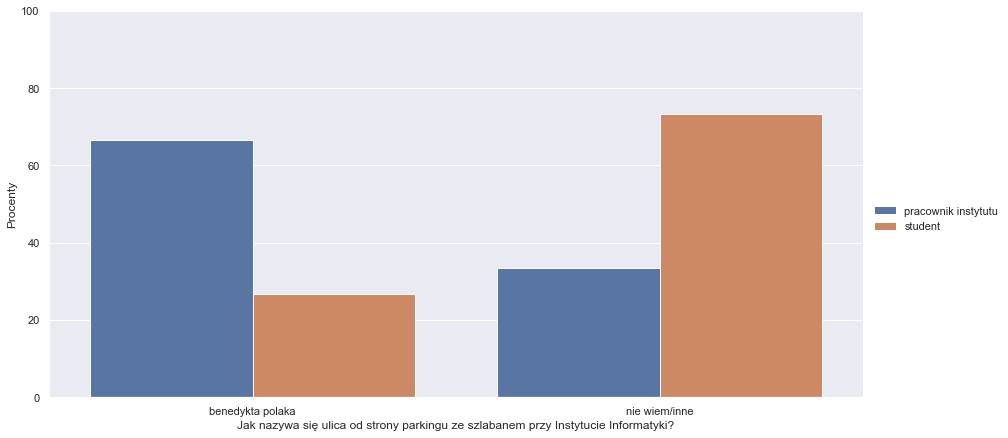

In [34]:
x = 19
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [35]:
keywords = ['bravo']


for row in df[20]:
    if any(keyword in row for keyword in keywords):
        df[20] = df[20].replace(row, 'bravo')
        df_plot[20] = df_plot[20].replace(row, 'bravo')
    else:
        df_plot[20] = df_plot[20].replace(row, 'nie wiem/inne')
        
#df[20].value_counts()

0                    20           
pracownik instytutu  bravo            77.777778
                     nie wiem/inne    22.222222
student              bravo            56.666667
                     nie wiem/inne    43.333333
Name: 20, dtype: float64


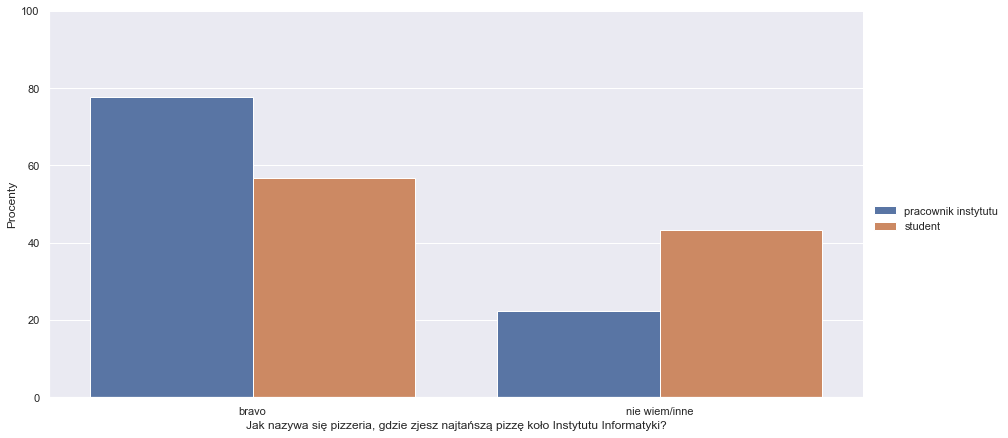

In [36]:
x = 20
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [37]:
keywords = ['kolo', 'studentow', 'inf']


for row in df[21]:
    if all(keyword in row for keyword in keywords):
        df[21] = df[21].replace(row, 'kolo studentow informatyki')
        df_plot[21] = df_plot[21].replace(row, 'kolo studentow informatyki')
    else:
        df_plot[21] = df_plot[21].replace(row, 'nie wiem/inne')
        
#print(df[21].value_counts())

0                    21                        
pracownik instytutu  kolo studentow informatyki    88.888889
                     nie wiem/inne                 11.111111
student              kolo studentow informatyki    83.333333
                     nie wiem/inne                 16.666667
Name: 21, dtype: float64


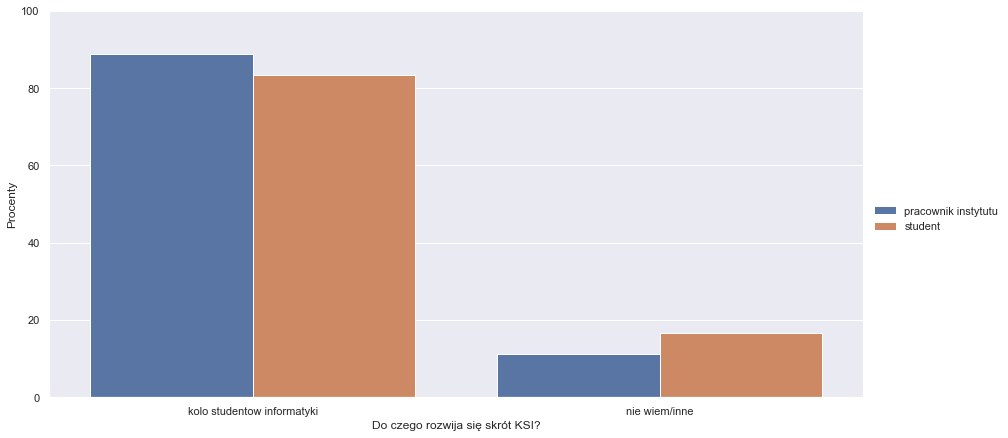

In [38]:
x = 21
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    22
pracownik instytutu  35    77.777778
                     40    11.111111
                     30     5.555556
                     45     5.555556
student              35    81.111111
                     30     7.777778
                     40     6.666667
                     45     4.444444
Name: 22, dtype: float64


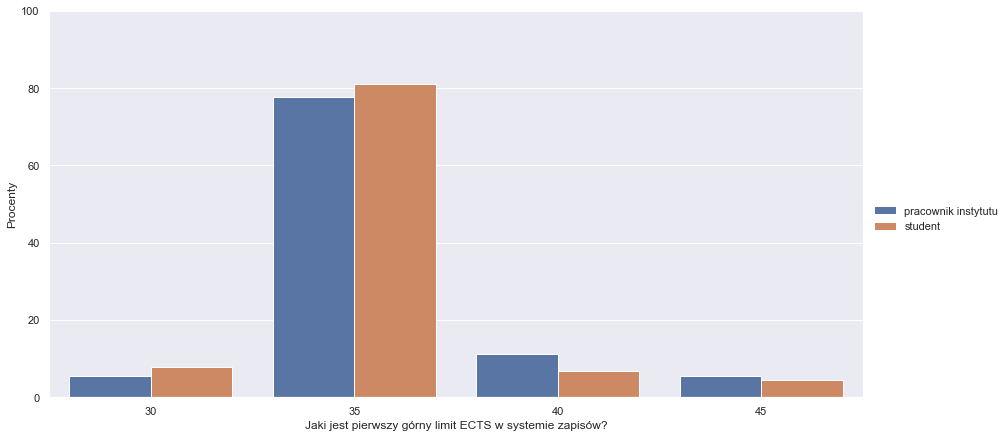

In [39]:
x = 22
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    23
pracownik instytutu  50    33.333333
                     60    33.333333
                     45    22.222222
                     40    11.111111
student              45    52.222222
                     60    31.111111
                     50    15.555556
                     40     1.111111
Name: 23, dtype: float64


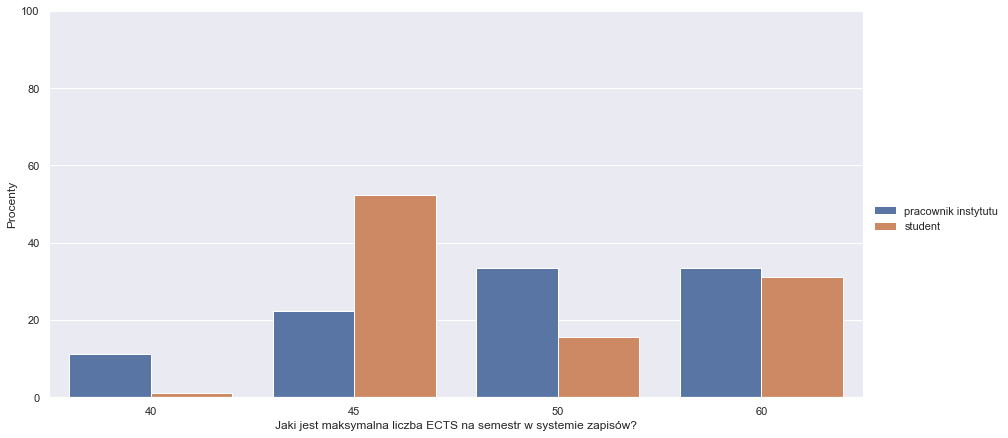

In [40]:
x = 23
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [41]:
keywords = ['jma', 'marcinkowski']


for row in df[24]:
    if any(keyword in row for keyword in keywords):
        df[24] = df[24].replace(row, 'jerzy marcinkowski')
        df_plot[24] = df_plot[24].replace(row, 'jerzy marcinkowski')
    else:
        df_plot[24] = df_plot[24].replace(row, 'nie wiem/inne')
        
#df[24].value_counts()

0                    24                
pracownik instytutu  jerzy marcinkowski    94.444444
                     nie wiem/inne          5.555556
student              nie wiem/inne         56.666667
                     jerzy marcinkowski    43.333333
Name: 24, dtype: float64


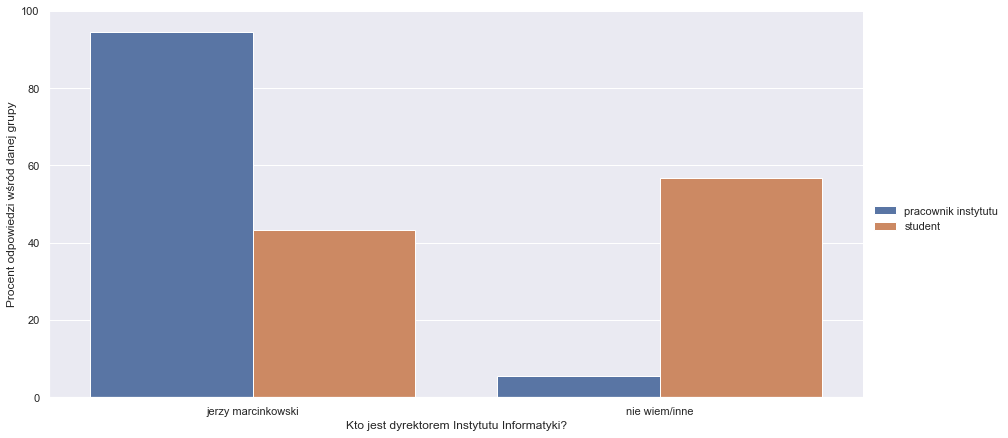

In [42]:
x = 24
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procent odpowiedzi wśród danej grupy').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procent odpowiedzi wśród danej grupy', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    25
pracownik instytutu  4     50.000000
                     1     22.222222
                     3     22.222222
                     2      5.555556
student              2     52.222222
                     1     31.111111
                     4      8.888889
                     3      7.777778
Name: 25, dtype: float64


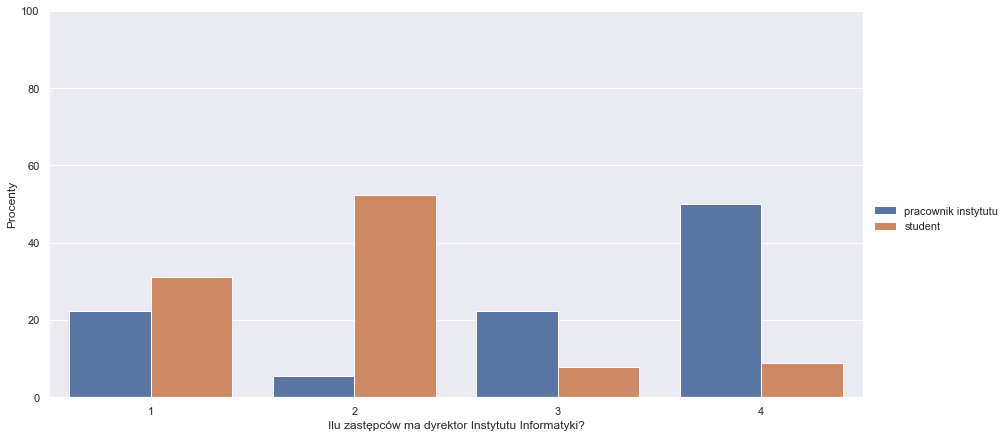

In [43]:
x = 25
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [44]:
keywords = ['plastyczna', 'platyczna']


for row in df[26]:
    if any(keyword in row for keyword in keywords):
        df[26] = df[26].replace(row, 'plastyczna')
        df_plot[26] = df_plot[26].replace(row, 'plastyczna')
    else:
        df_plot[26] = df_plot[26].replace(row, 'nie wiem/inne')
        
#df[26].value_counts()

0                    26           
pracownik instytutu  plastyczna       94.444444
                     nie wiem/inne     5.555556
student              plastyczna       78.888889
                     nie wiem/inne    21.111111
Name: 26, dtype: float64


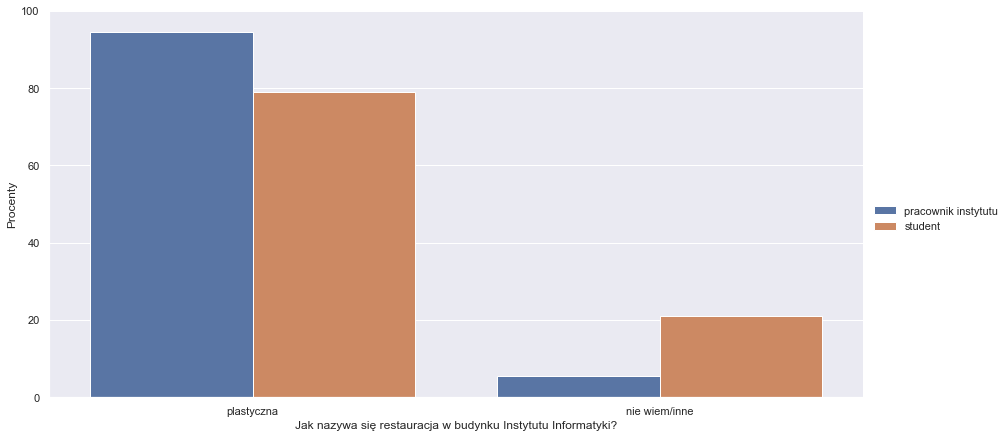

In [45]:
x = 26
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    27
pracownik instytutu  24    72.222222
                     12    16.666667
                     36     5.555556
                     48     5.555556
student              24    81.111111
                     48    10.000000
                     12     6.666667
                     36     2.222222
Name: 27, dtype: float64


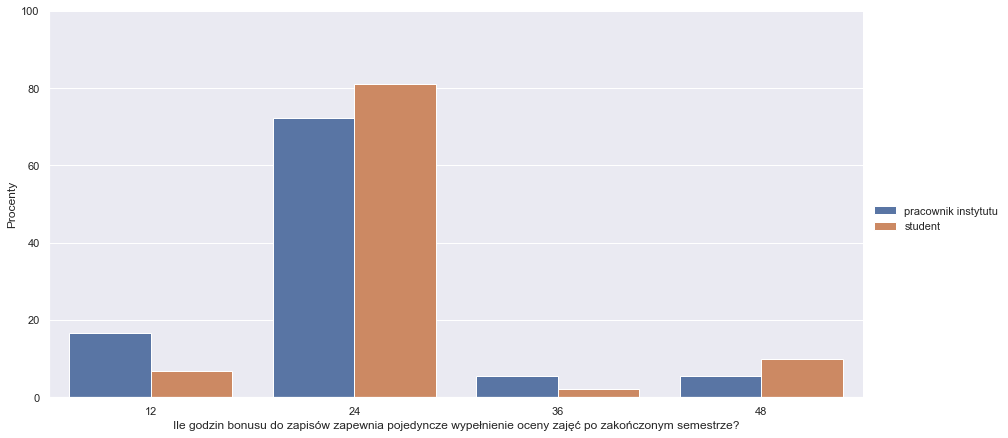

In [46]:
x = 27
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    28
pracownik instytutu  3     94.444444
                     10     5.555556
student              3     95.555556
                     5      4.444444
Name: 28, dtype: float64


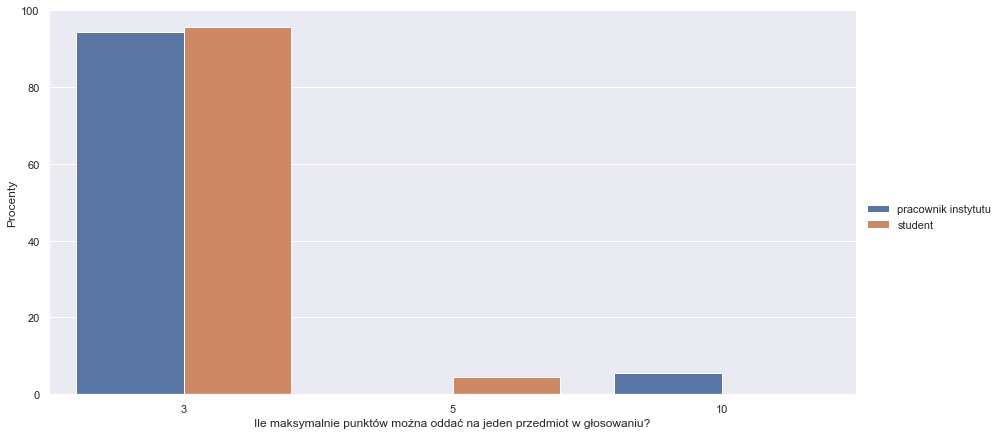

In [47]:
x = 28
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    29               
pracownik instytutu  lukasz piwowar       72.222222
                     jakub kowalski       11.111111
                     wiktor zychla        11.111111
                     marcin mlotkowski     5.555556
student              lukasz piwowar       72.222222
                     jakub kowalski       11.111111
                     wiktor zychla        10.000000
                     marcin mlotkowski     6.666667
Name: 29, dtype: float64


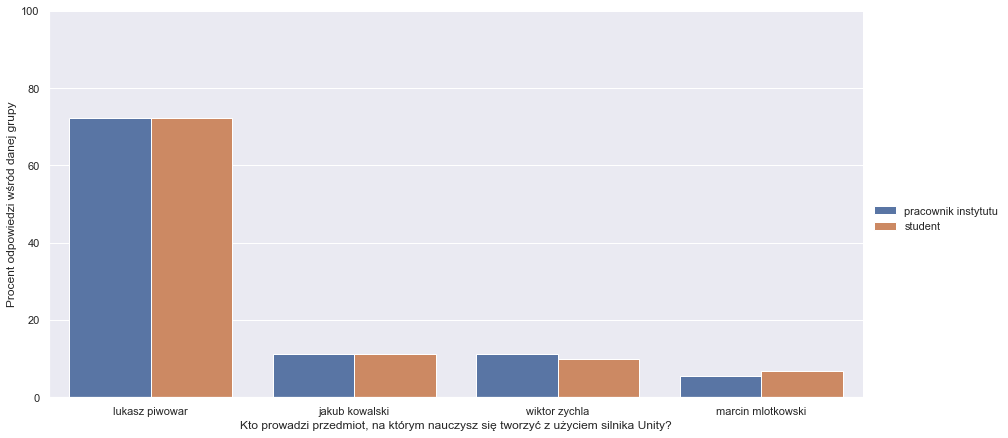

In [48]:
x = 29
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procent odpowiedzi wśród danej grupy').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procent odpowiedzi wśród danej grupy', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    30                             
pracownik instytutu  osoba ukryla swoje dane osobowe    88.888889
                     osoba jest z erasmusa              11.111111
student              osoba ukryla swoje dane osobowe    98.888889
                     osoba jest z erasmusa               1.111111
Name: 30, dtype: float64


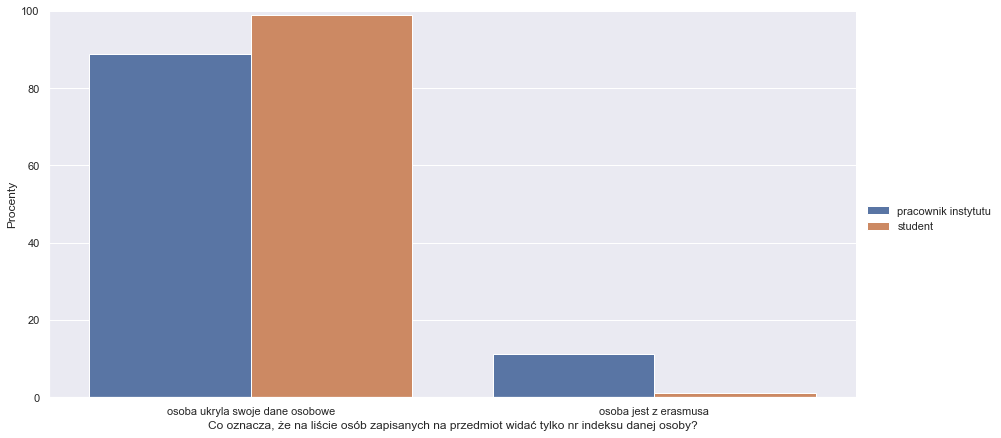

In [49]:
x = 30
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    31
pracownik instytutu  12    44.444444
                     24    44.444444
                     48     5.555556
                     72     5.555556
student              24    85.555556
                     12    13.333333
                     48     1.111111
Name: 31, dtype: float64


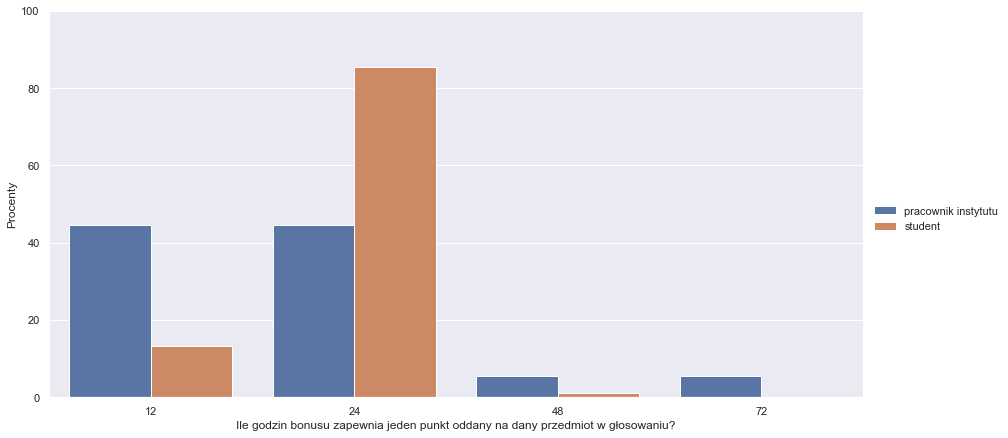

In [50]:
x = 31
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    32               
pracownik instytutu  sprawdziany          77.777778
                     listy zadan          16.666667
                     zaliczenia etapow     5.555556
student              sprawdziany          88.888889
                     listy zadan           6.666667
                     oceny koncowe         2.222222
                     zaliczenia etapow     2.222222
Name: 32, dtype: float64


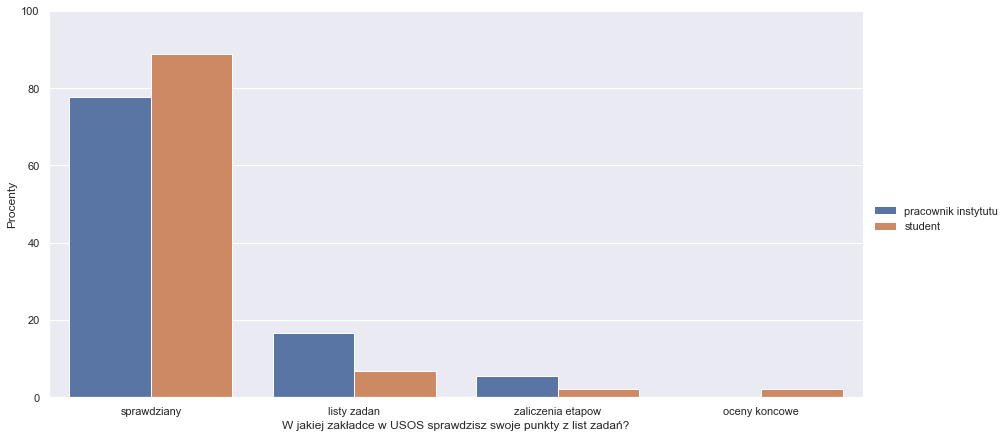

In [51]:
x = 32
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    33                   
pracownik instytutu  do kolejki               83.333333
                     do listy oczekujacych    16.666667
student              do kolejki               92.222222
                     do listy oczekujacych     6.666667
                     do listy rezerwowej       1.111111
Name: 33, dtype: float64


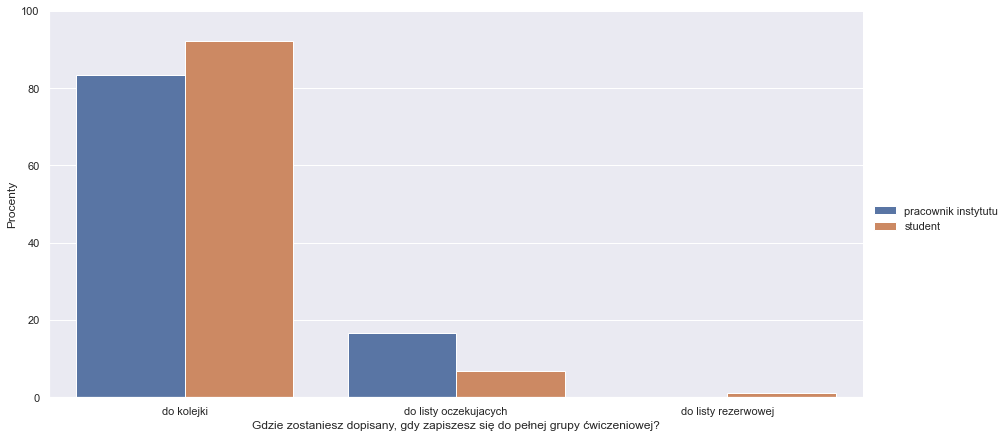

In [52]:
x = 33
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [53]:
keywords = ['matematyki i informatyki', 'wmi', 'matemetyki i informatyki']
keywords_wrong_answer = ['informatyki i matematyki']


for row in df[34]:
    if any(keyword in row for keyword in keywords):
        df[34] = df[34].replace(row, 'wydzial matematyki i informatyki')
        df_plot[34] = df_plot[34].replace(row, 'wydzial matematyki i informatyki')
    elif any(keyword in row for keyword in keywords_wrong_answer):
        df[34] = df[34].replace(row, 'wydzial informatyki i matematyki')
        df_plot[34] = df_plot[34].replace(row, 'wydzial informatyki i matematyki')
    else:
        df_plot[34] = df_plot[34].replace(row, 'nie wiem/inne')
        
#df[34].value_counts()

0                    34                              
pracownik instytutu  wydzial matematyki i informatyki    100.000000
student              wydzial matematyki i informatyki     76.666667
                     nie wiem/inne                        14.444444
                     wydzial informatyki i matematyki      8.888889
Name: 34, dtype: float64


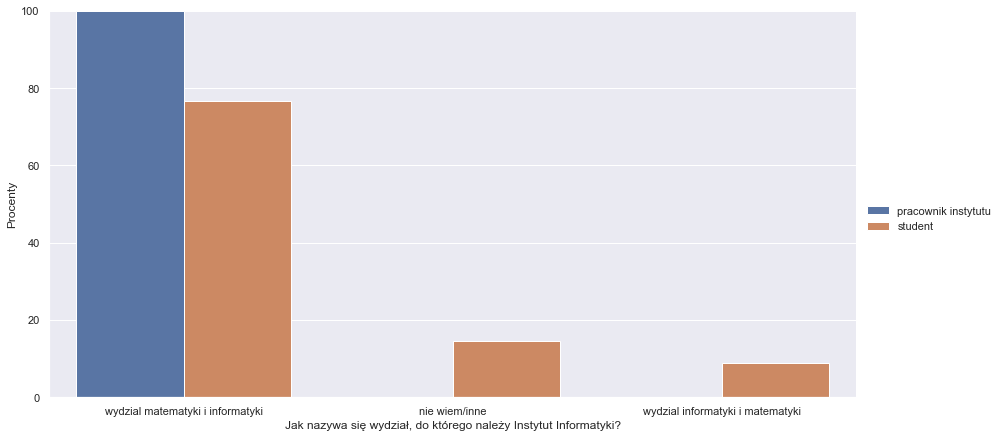

In [54]:
x = 34
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    35
pracownik instytutu  6     88.888889
                     5      5.555556
                     7      5.555556
student              6     95.555556
                     5      2.222222
                     7      2.222222
Name: 35, dtype: float64


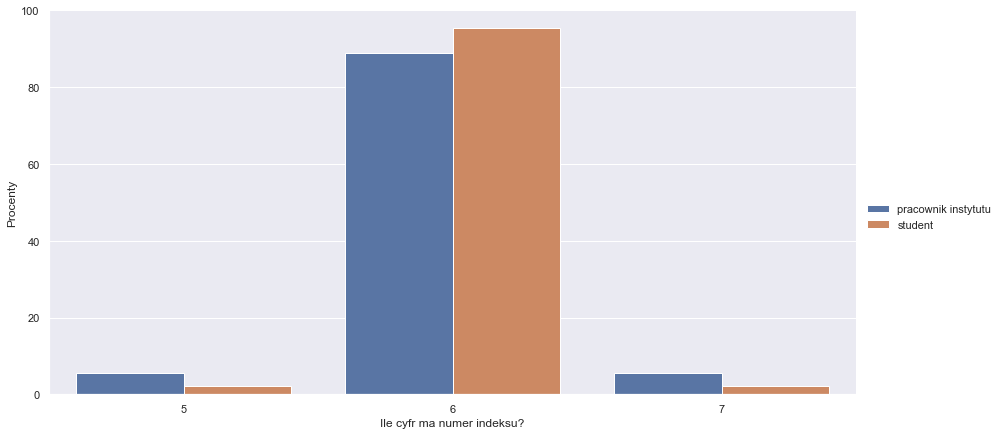

In [55]:
x = 35
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [56]:
keywords = ['sieci komputerowe']
keywords_wrong_answer = ['systemy komputerowe']


for row in df[36]:
    if all(keyword in row for keyword in keywords):
        df[36] = df[36].replace(row, 'sieci komputerowe')
        df_plot[36] = df_plot[36].replace(row, 'sieci komputerowe')
    elif all(keyword in row for keyword in keywords_wrong_answer):
        df[36] = df[36].replace(row, 'systemy komputerowe')
        df_plot[36] = df_plot[36].replace(row, 'systemy komputerowe')
    else:
        df_plot[36] = df_plot[36].replace(row, 'nie wiem/inne')
        
#df[36].value_counts()

0                    36                 
pracownik instytutu  systemy komputerowe    44.444444
                     sieci komputerowe      33.333333
                     nie wiem/inne          22.222222
student              sieci komputerowe      56.666667
                     systemy komputerowe    27.777778
                     nie wiem/inne          15.555556
Name: 36, dtype: float64


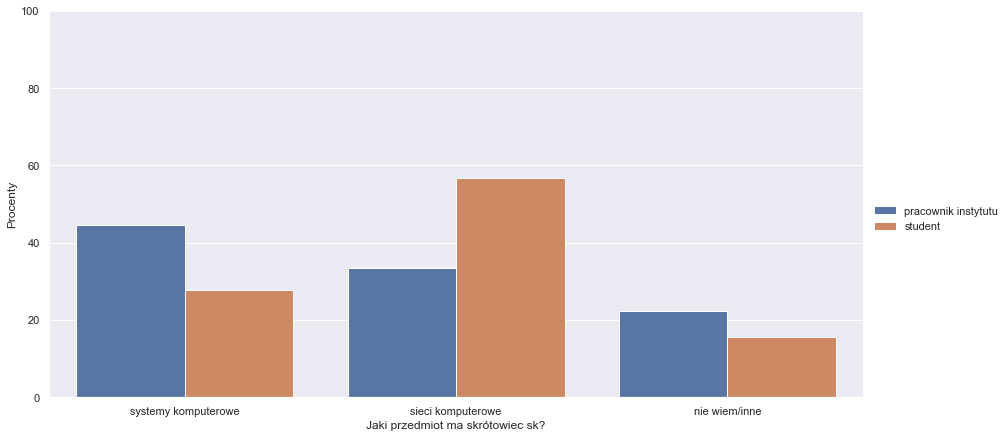

In [57]:
x = 36
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [58]:
keywords = ['projektowanie obiektowe oprogramowania', 'projektowanie obiektowe oprogranowania',
            'projektowanie obiektowe oprogramowani']
keywords_wrong_answer_first = ['programowanie obiektowe oprogramowania']
keywords_wrong_answer_second = ['projektowanie oprogramowania obiektowego']

for row in df[37]:
    if any(keyword in row for keyword in keywords):
        df[37] = df[37].replace(row, 'projektowanie obiektowe oprogramowania')
        df_plot[37] = df_plot[37].replace(row, 'projektowanie obiektowe oprogramowania')
    elif any(keyword in row for keyword in keywords_wrong_answer_first):
        df[37] = df[37].replace(row, 'programowanie obiektowe oprogramowania')
        df_plot[37] = df_plot[37].replace(row, 'programowanie obiektowe oprogramowania')
    elif any(keyword in row for keyword in keywords_wrong_answer_second):
        df[37] = df[37].replace(row, 'projektowanie oprogramowania obiektowego')
        df_plot[37] = df_plot[37].replace(row, 'projektowanie oprogramowania obiektowego')
    else:
        df_plot[37] = df_plot[37].replace(row, 'nie wiem/inne')
        
#df[37].value_counts()

0                    37                                      
pracownik instytutu  projektowanie obiektowe oprogramowania      61.111111
                     nie wiem/inne                               38.888889
student              projektowanie obiektowe oprogramowania      46.666667
                     nie wiem/inne                               32.222222
                     programowanie obiektowe oprogramowania      13.333333
                     projektowanie oprogramowania obiektowego     7.777778
Name: 37, dtype: float64


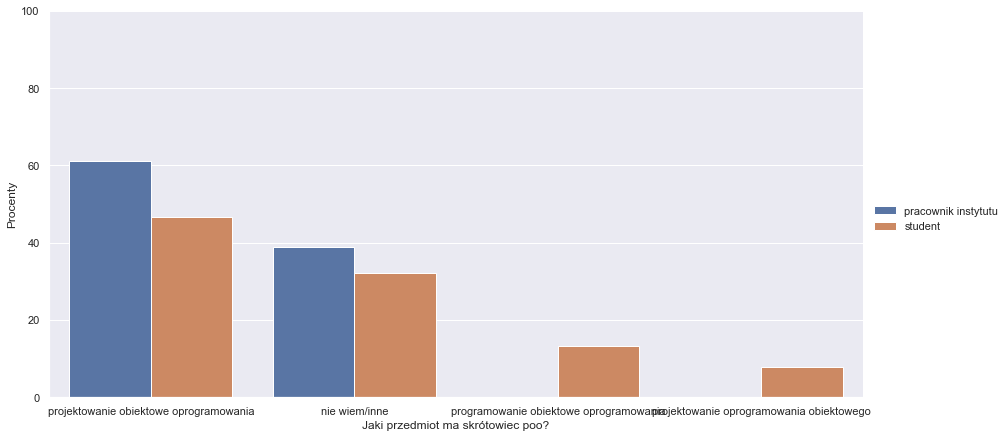

In [59]:
x = 37
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [60]:
keywords = ['komunikacja', 'czlowiek', 'komputer']
keywords_typo = ['komunikacji czlowiek komputer', 'komunikacja czlowiek kumputer']

for row in df[38]:
    if all(keyword in row for keyword in keywords) or any(keyword in row for keyword in keywords_typo):
        df[38] = df[38].replace(row, 'komunikacja czlowiek-komputer')
        df_plot[38] = df_plot[38].replace(row, 'komunikacja czlowiek-komputer')
    else:
        df_plot[38] = df_plot[38].replace(row, 'nie wiem/inne')

#df[38].value_counts()

0                    38                           
pracownik instytutu  komunikacja czlowiek-komputer    66.666667
                     nie wiem/inne                    33.333333
student              komunikacja czlowiek-komputer    73.333333
                     nie wiem/inne                    26.666667
Name: 38, dtype: float64


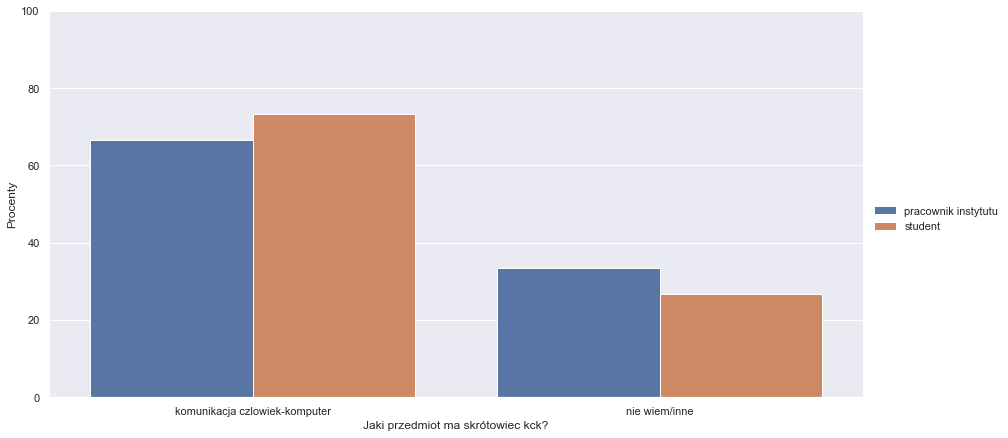

In [61]:
x = 38
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [62]:
keywords_first = ['rachunek']
keywords_second = ['prawdopodobienstwa', 'pp', 'prwd', 'pstwa', 'prawd', 'orawdopodobienstwa']
keywords_third = ['statystyka', 'statystyki']

for row in df[39]:
    if (any(keyword in row for keyword in keywords_first) and 
        any(keyword in row for keyword in keywords_second) and 
        any(keyword in row for keyword in keywords_third)):
        df[39] = df[39].replace(row, 'rachunek prawdopodobienstwa i statystyka')
        df_plot[39] = df_plot[39].replace(row, 'rachunek prawdopodobienstwa i statystyka')
    else:
        df_plot[39] = df_plot[39].replace(row, 'nie wiem/inne')

#df[39].value_counts()

0                    39                                      
pracownik instytutu  rachunek prawdopodobienstwa i statystyka    83.333333
                     nie wiem/inne                               16.666667
student              rachunek prawdopodobienstwa i statystyka    90.000000
                     nie wiem/inne                               10.000000
Name: 39, dtype: float64


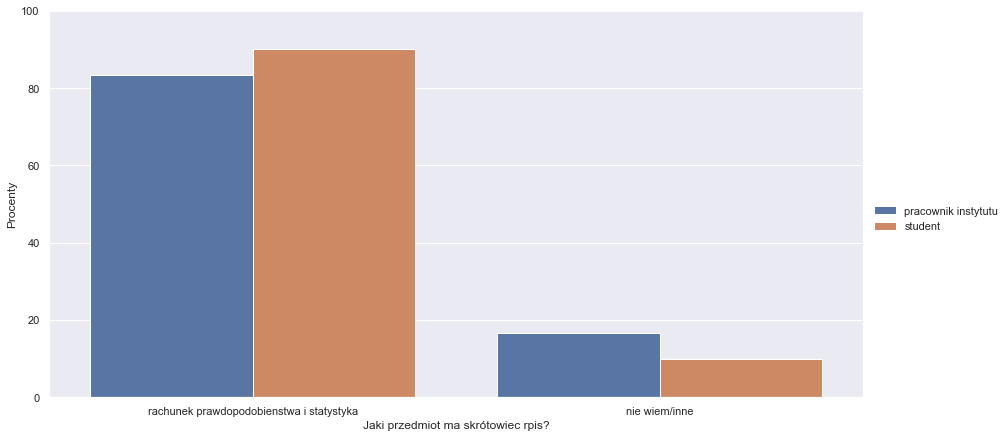

In [63]:
x = 39
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    40                    
pracownik instytutu  zdzislaw ploski           94.444444
                     pawel laskos-grabowski     5.555556
student              zdzislaw ploski           85.555556
                     pawel laskos-grabowski    11.111111
                     bartosz bednarczyk         2.222222
                     rafal nowak                1.111111
Name: 40, dtype: float64


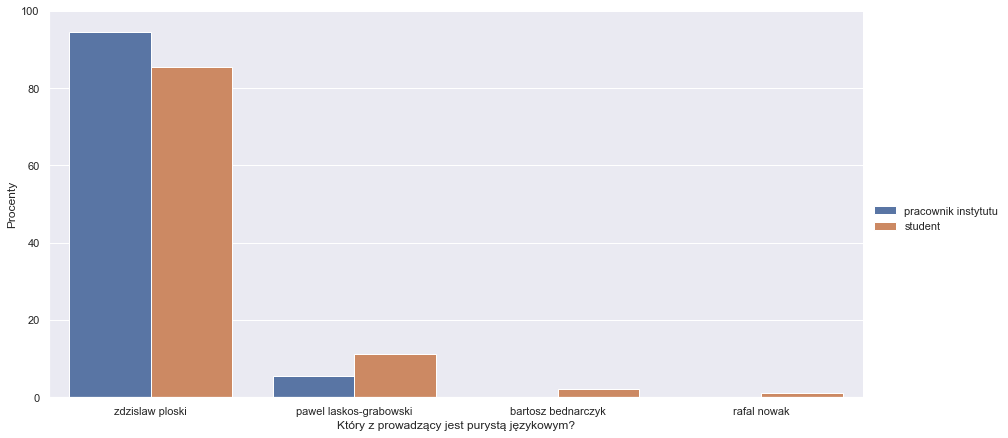

In [64]:
x = 40
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    41        
pracownik instytutu  moje konto    33.333333
                     moj profil    27.777778
                     zaliczenia    27.777778
                     wyniki        11.111111
student              moje konto    40.000000
                     zaliczenia    30.000000
                     moj profil    26.666667
                     wyniki         3.333333
Name: 41, dtype: float64


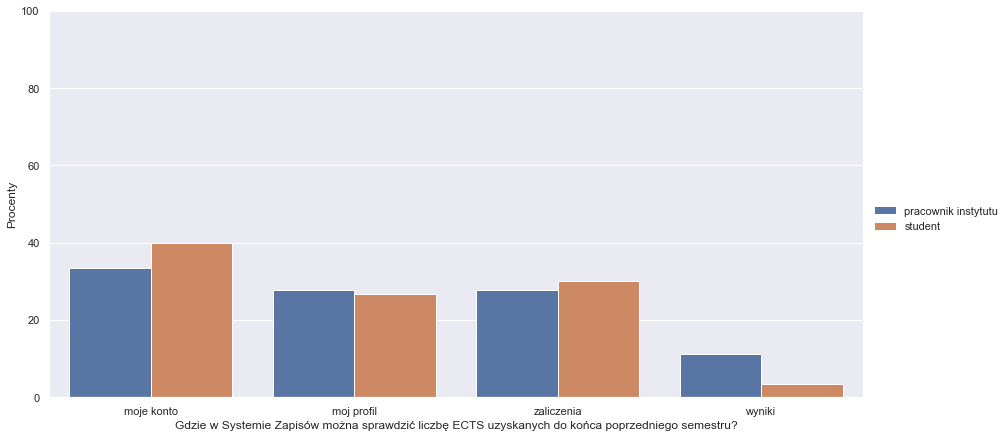

In [65]:
x = 41
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [66]:
keywords = ['testowanie gier', 'tg']
keywords_ai4games = ['ai4games']
keywords_sztuczna = ['sztuczna inteligencja']
keywords_unity = ['unity']

for row in df[42]:
    if any(keyword in row for keyword in keywords):
        df[42] = df[42].replace(row, 'testowanie gier')
        df_plot[42] = df_plot[42].replace(row, 'testowanie gier')
    elif any(keyword in row for keyword in keywords_ai4games):
        df[42] = df[42].replace(row, 'ai4games')
        df_plot[42] = df_plot[42].replace(row, 'ai4games')
    elif any(keyword in row for keyword in keywords_sztuczna):
        df[42] = df[42].replace(row, 'sztuczna inteligencja')
        df_plot[42] = df_plot[42].replace(row, 'sztuczna inteligencja')
    elif any(keyword in row for keyword in keywords_unity):
        df[42] = df[42].replace(row, 'unity')
        df_plot[42] = df_plot[42].replace(row, 'unity')
    else:
        df_plot[42] = df_plot[42].replace(row, 'nie wiem/inne')

#df[42].value_counts()

0                    42                   
pracownik instytutu  nie wiem/inne            72.222222
                     ai4games                 11.111111
                     testowanie gier          11.111111
                     sztuczna inteligencja     5.555556
student              testowanie gier          62.222222
                     nie wiem/inne            30.000000
                     sztuczna inteligencja     3.333333
                     ai4games                  2.222222
                     unity                     2.222222
Name: 42, dtype: float64


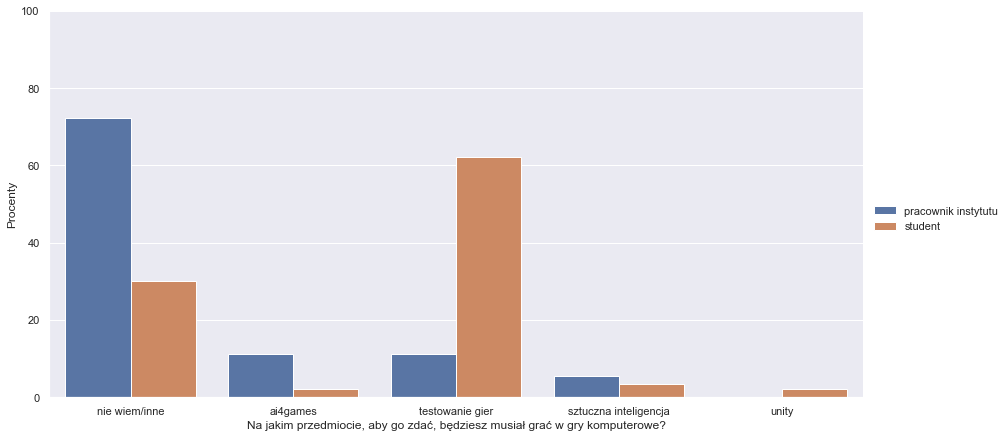

In [67]:
x = 42
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [68]:
keywords = ['most grunwaldzki', 'most gruwaldzki']

for row in df[43]:
    if any(keyword in row for keyword in keywords):
        df[43] = df[43].replace(row, 'most grunwaldzki')
        df_plot[43] = df_plot[43].replace(row, 'most grunwaldzki')
    else:
        df_plot[43] = df_plot[43].replace(row, 'nie wiem/inne')

#df[43].value_counts()

0                    43              
pracownik instytutu  most grunwaldzki    83.333333
                     nie wiem/inne       16.666667
student              most grunwaldzki    83.333333
                     nie wiem/inne       16.666667
Name: 43, dtype: float64


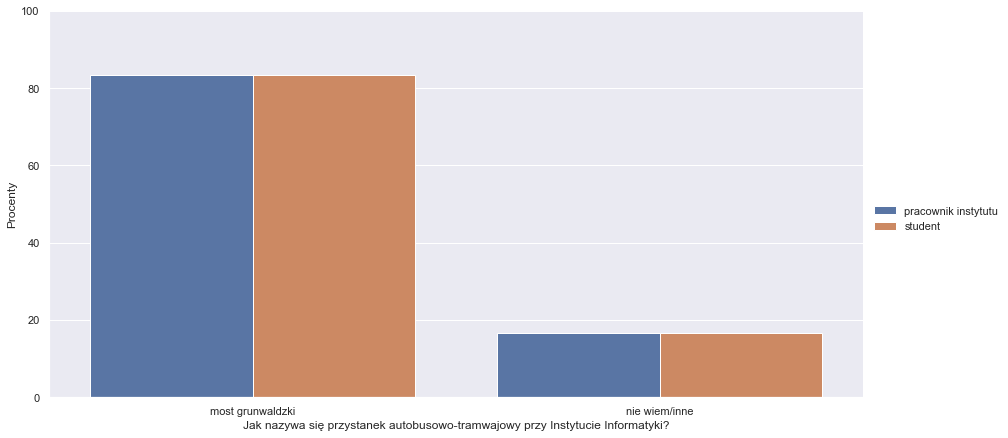

In [69]:
x = 43
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [70]:
keywords = ['nauki i szkolnictwa wyzszego']
keywords_wrong_answer_first = ['edukacji i nauki', 'mein']
keywords_wrong_answer_second = ['edukacji i szkolnictwa wyzszego']
keywords_wrong_answer_third = ['edukacji', 'men']
keywords_wrong_answer_fourth = ['szkolnictwa wyzszego']

for row in df[44]:
    if any(keyword in row for keyword in keywords):
        df[44] = df[44].replace(row, 'ministerstwo nauki i szkolnictwa wyzszego')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo nauki i szkolnictwa wyzszego')
    elif any(keyword in row for keyword in keywords_wrong_answer_first):
        df[44] = df[44].replace(row, 'ministerstwo edukacji i nauki')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo edukacji i nauki')
    elif any(keyword in row for keyword in keywords_wrong_answer_second):
        df[44] = df[44].replace(row, 'ministerstwo edukacji i szkolnictwa wyzszego')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo edukacji i szkolnictwa wyzszego')
    elif any(keyword in row for keyword in keywords_wrong_answer_third):
        df[44] = df[44].replace(row, 'ministerstwo edukacji')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo edukacji')
    elif any(keyword in row for keyword in keywords_wrong_answer_fourth):
        df[44] = df[44].replace(row, 'ministerstwo szkolnictwa wyzszego')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo szkolnictwa wyzszego')
    else:
        df_plot[44] = df_plot[44].replace(row, 'nie wiem/inne')

#df[44].value_counts()

0                    44                                          
pracownik instytutu  ministerstwo edukacji i nauki                   50.000000
                     ministerstwo edukacji                           16.666667
                     ministerstwo edukacji i szkolnictwa wyzszego    11.111111
                     ministerstwo nauki i szkolnictwa wyzszego       11.111111
                     nie wiem/inne                                   11.111111
student              nie wiem/inne                                   51.111111
                     ministerstwo edukacji                           18.888889
                     ministerstwo edukacji i nauki                   14.444444
                     ministerstwo szkolnictwa wyzszego                8.888889
                     ministerstwo edukacji i szkolnictwa wyzszego     3.333333
                     ministerstwo nauki i szkolnictwa wyzszego        3.333333
Name: 44, dtype: float64


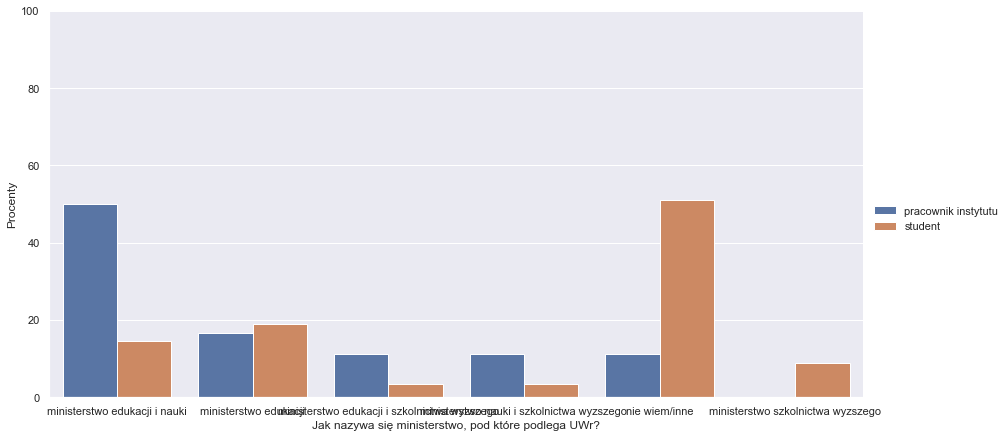

In [71]:
x = 44
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    45                                    
pracownik instytutu  jest otwarty od poniedzialku do piatku    33.333333
                     sroda                                     33.333333
                     piatek                                    27.777778
                     poniedzialek                               5.555556
student              piatek                                    63.333333
                     jest otwarty od poniedzialku do piatku    18.888889
                     sroda                                     11.111111
                     poniedzialek                               6.666667
Name: 45, dtype: float64


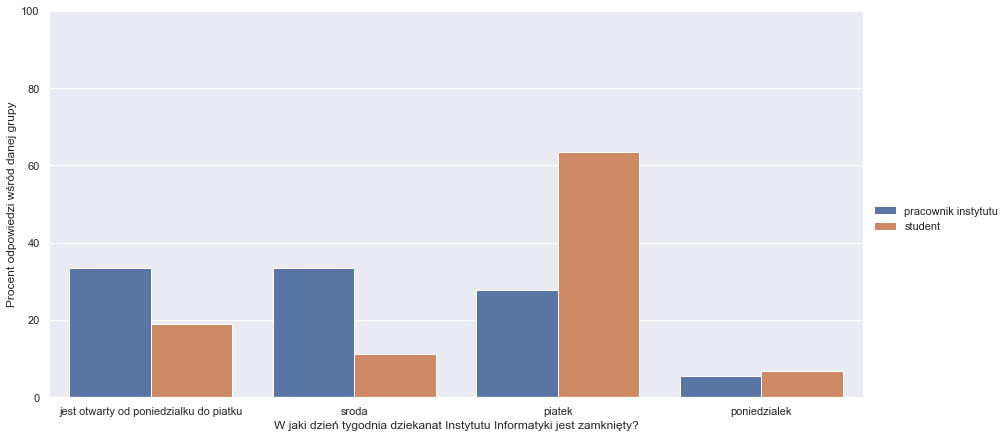

In [72]:
x = 45
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procent odpowiedzi wśród danej grupy').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procent odpowiedzi wśród danej grupy', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [73]:
keywords = ['golebnik']
keywords_polka = ['polka', 'polki', 'pulka', 'poleczki', 'poleczka']
keywords_szafka = ['szafka', 'szafeczki']

for row in df[46]:
    if any(keyword in row for keyword in keywords):
        df[46] = df[46].replace(row, 'golebnik')
        df_plot[46] = df_plot[46].replace(row, 'golebnik')
    elif any(keyword in row for keyword in keywords_polka):
        df[46] = df[46].replace(row, 'polka')
        df_plot[46] = df_plot[46].replace(row, 'polka')
    elif any(keyword in row for keyword in keywords_szafka):
        df[46] = df[46].replace(row, 'szafka')
        df_plot[46] = df_plot[46].replace(row, 'szafka')
    else:
        df_plot[46] = df_plot[46].replace(row, 'nie wiem/inne')

#df[46].value_counts()

0                    46           
pracownik instytutu  nie wiem/inne    50.000000
                     polka            50.000000
student              nie wiem/inne    48.888889
                     polka            36.666667
                     szafka            7.777778
                     golebnik          6.666667
Name: 46, dtype: float64


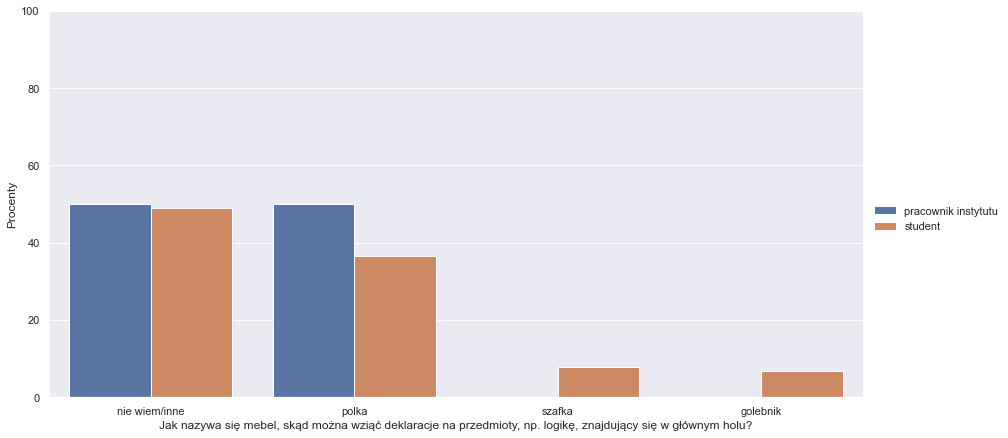

In [74]:
x = 46
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    47       
pracownik instytutu  zielony      83.333333
                     bialy         5.555556
                     niebieski     5.555556
                     szary         5.555556
student              zielony      77.777778
                     niebieski    18.888889
                     szary         3.333333
Name: 47, dtype: float64


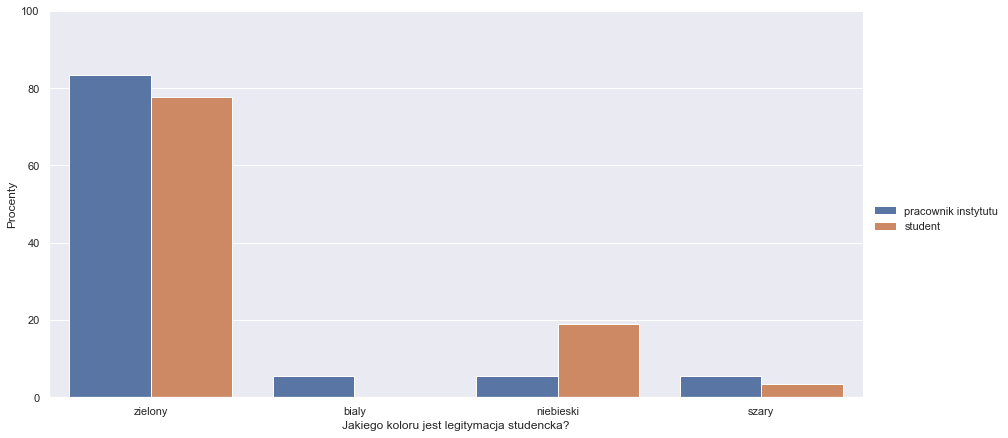

In [75]:
x = 47
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    48
pracownik instytutu  2     88.888889
                     3      5.555556
                     4      5.555556
student              2     93.333333
                     3      4.444444
                     4      1.111111
                     5      1.111111
Name: 48, dtype: float64


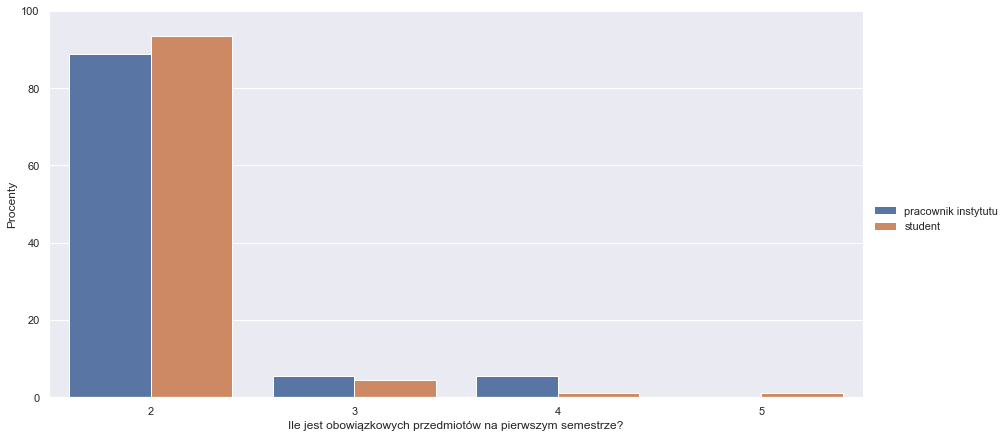

In [76]:
x = 48
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [77]:
keywords = ['system', 'komunikacji','odleglosc', 'student']
keywords_komunikacji = ['system komunikacji']
keywords_ksztalcenia = ['system ksztalcenia']

for row in df[49]:
    if all(keyword in row for keyword in keywords):
        df[49] = df[49].replace(row, 'system komunikacji na odleglosc ze studentami')
        df_plot[49] = df_plot[49].replace(row, 'system komunikacji na odleglosc ze studentami')
    elif all(keyword in row for keyword in keywords_komunikacji):
        df[49] = df[49].replace(row, 'system komunikacji...')
        df_plot[49] = df_plot[49].replace(row, 'system komunikacji...')
    elif all(keyword in row for keyword in keywords_ksztalcenia):
        df[49] = df[49].replace(row, 'system ksztalcenia...')
        df_plot[49] = df_plot[49].replace(row, 'system ksztalcenia...')
    else:
        df_plot[49] = df_plot[49].replace(row, 'nie wiem/inne')

#df[49].value_counts()

0                    49                                           
pracownik instytutu  nie wiem/inne                                    38.888889
                     system komunikacji...                            22.222222
                     system ksztalcenia...                            22.222222
                     system komunikacji na odleglosc ze studentami    16.666667
student              nie wiem/inne                                    48.888889
                     system komunikacji na odleglosc ze studentami    33.333333
                     system komunikacji...                            16.666667
                     system ksztalcenia...                             1.111111
Name: 49, dtype: float64


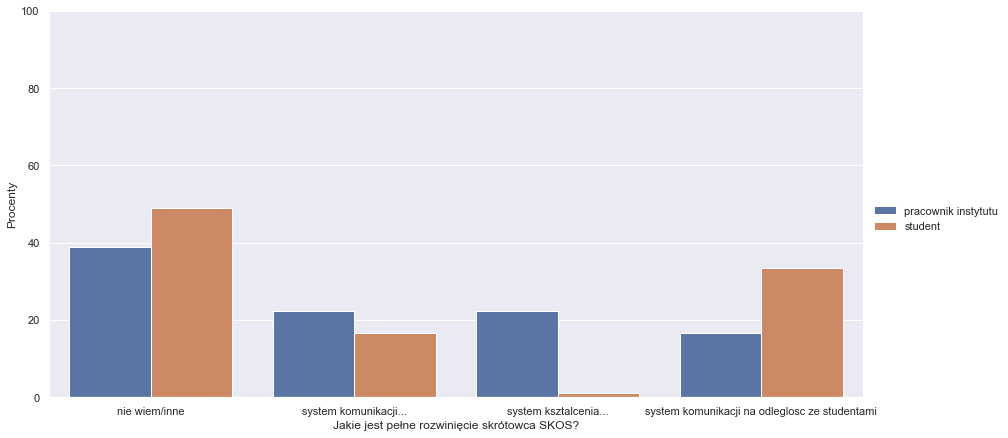

In [78]:
x = 49
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [79]:
keywords = ['mp', 'metody programowania', 'metody prog', 'metody programowaniq']

for row in df[50]:
    if any(keyword in row for keyword in keywords):
        df[50] = df[50].replace(row, 'metody programowania')
        df_plot[50] = df_plot[50].replace(row, 'metody programowania')
    else:
        df_plot[50] = df_plot[50].replace(row, 'nie wiem/inne')

#df[50].value_counts()

0                    50                  
pracownik instytutu  nie wiem/inne           55.555556
                     metody programowania    44.444444
student              metody programowania    95.555556
                     nie wiem/inne            4.444444
Name: 50, dtype: float64


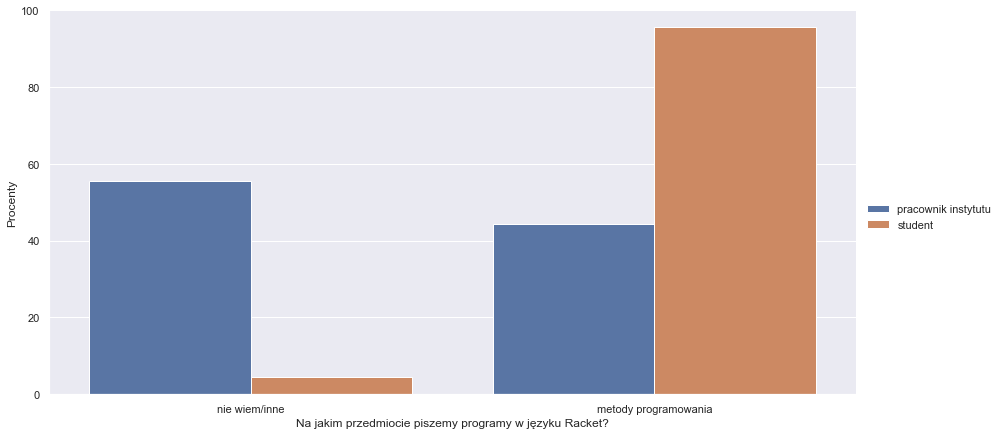

In [80]:
x = 50
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    51    
pracownik instytutu  alpaki    94.444444
                     koty       5.555556
student              alpaki    82.222222
                     psy        8.888889
                     koty       5.555556
                     kozy       3.333333
Name: 51, dtype: float64


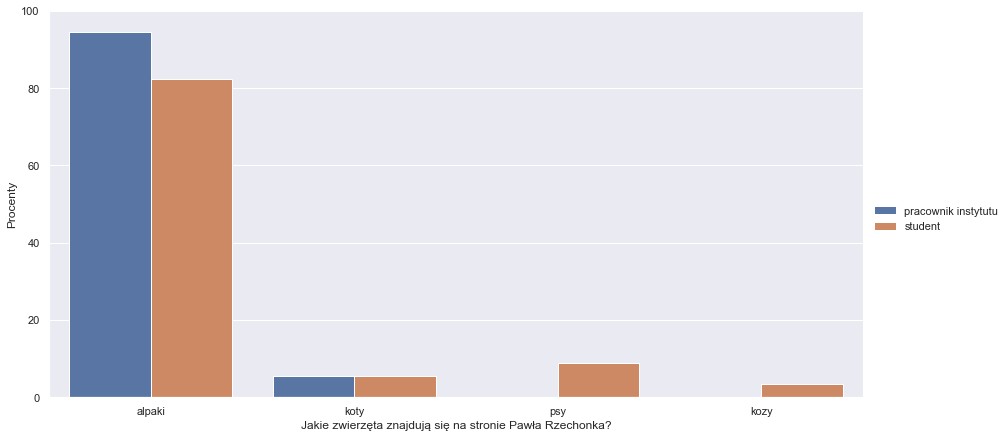

In [81]:
x = 51
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    52
pracownik instytutu  4     44.444444
                     3     33.333333
                     5     22.222222
student              4     48.888889
                     3     41.111111
                     2      6.666667
                     5      3.333333
Name: 52, dtype: float64


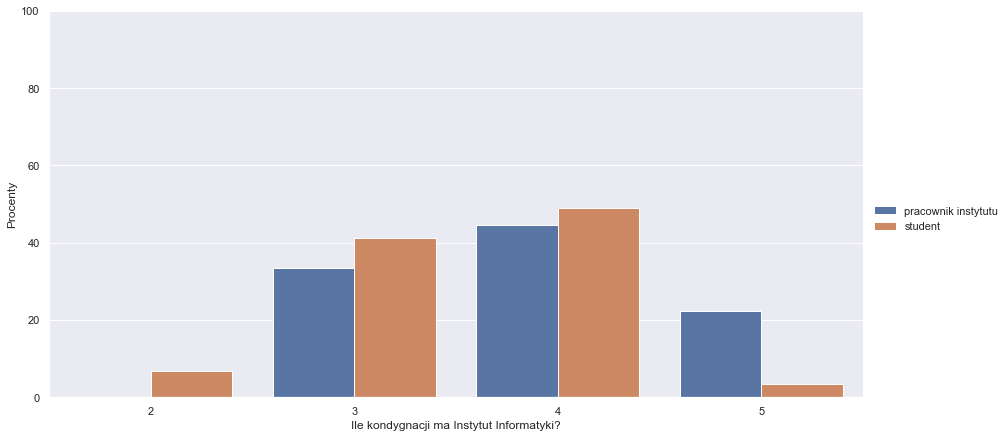

In [82]:
x = 52
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [83]:
keywords = ['jurdzinski', 'tju', 'jutdzinski']

for row in df[53]:
    if any(keyword in row for keyword in keywords):
        df[53] = df[53].replace(row, 'tomasz jurdzinski')
        df_plot[53] = df_plot[53].replace(row, 'tomasz jurdzinski')
    else:
        df_plot[53] = df_plot[53].replace(row, 'nie wiem/inne')

#df[53].value_counts()

0                    53               
pracownik instytutu  tomasz jurdzinski    88.888889
                     nie wiem/inne        11.111111
student              tomasz jurdzinski    57.777778
                     nie wiem/inne        42.222222
Name: 53, dtype: float64


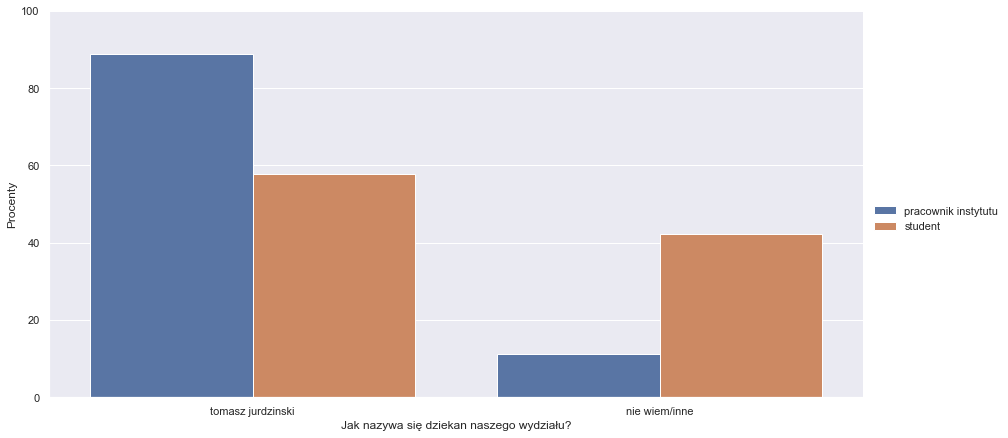

In [84]:
x = 53
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [85]:
keywords = ['prodziekan']

for row in df[54]:
    if any(keyword in row for keyword in keywords):
        df[54] = df[54].replace(row, 'prodziekan')
        df_plot[54] = df_plot[54].replace(row, 'prodziekan')
    else:
        df_plot[54] = df_plot[54].replace(row, 'nie wiem/inne')

#df[54].value_counts()

0                    54           
pracownik instytutu  prodziekan       61.111111
                     nie wiem/inne    38.888889
student              prodziekan       55.555556
                     nie wiem/inne    44.444444
Name: 54, dtype: float64


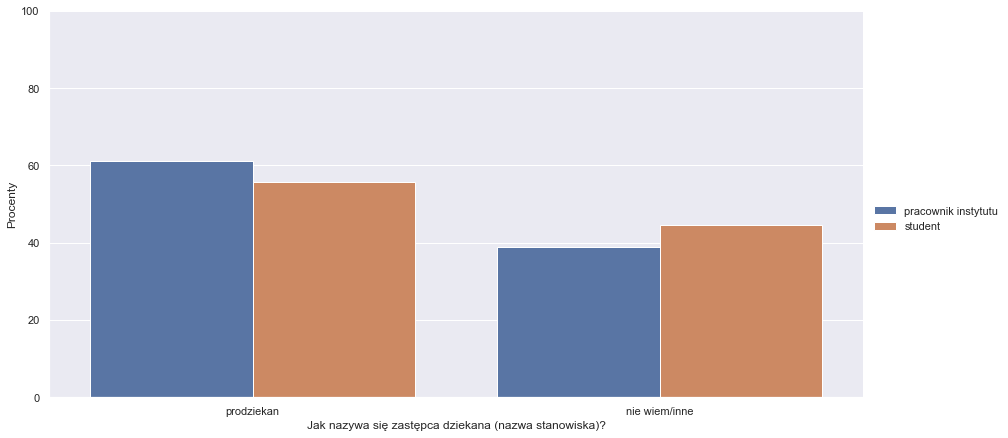

In [86]:
x = 54
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    55       
pracownik instytutu  2004-2006    83.333333
                     2008-2010    11.111111
                     2000-2002     5.555556
student              2004-2006    52.222222
                     2000-2002    21.111111
                     2008-2010    21.111111
                     2012-2014     5.555556
Name: 55, dtype: float64


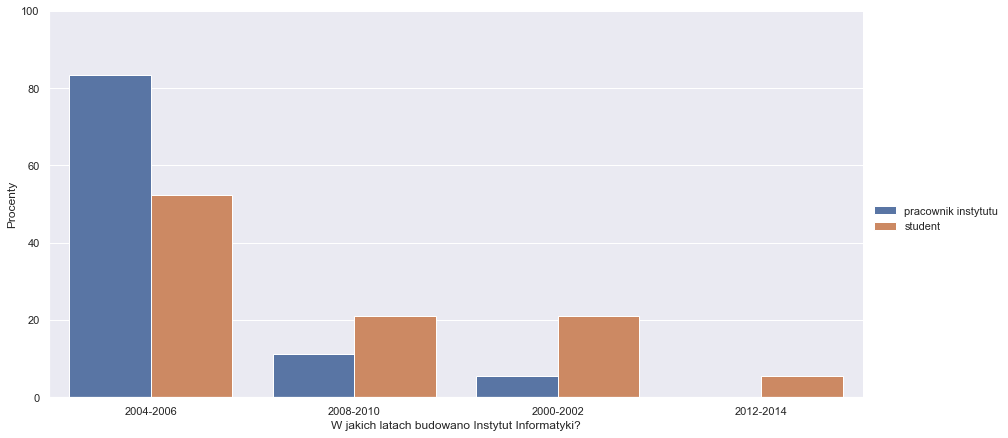

In [87]:
x = 55
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [88]:
keywords = ['olkiewicz']
keywords_wiszewski = ['wiszewski']

for row in df[56]:
    if any(keyword in row for keyword in keywords):
        df[56] = df[56].replace(row, 'robert olkiewicz')
        df_plot[56] = df_plot[56].replace(row, 'robert olkiewicz')
    elif any(keyword in row for keyword in keywords_wiszewski):
        df[56] = df[56].replace(row, 'przemyslaw wiszewski')
        df_plot[56] = df_plot[56].replace(row, 'przemyslaw wiszewski')
    else:
        df_plot[56] = df_plot[56].replace(row, 'nie wiem/inne')
        
#df[56].value_counts()

0                    56                  
pracownik instytutu  nie wiem/inne           55.555556
                     robert olkiewicz        44.444444
student              nie wiem/inne           92.222222
                     przemyslaw wiszewski     4.444444
                     robert olkiewicz         3.333333
Name: 56, dtype: float64


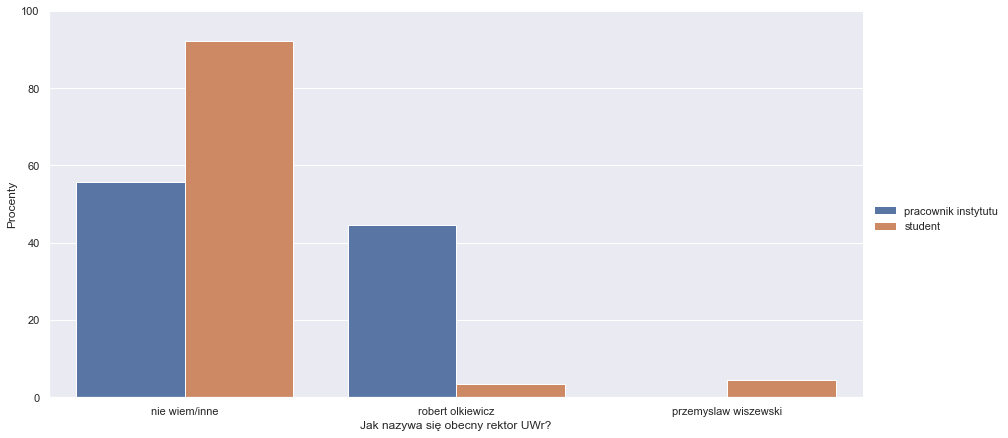

In [89]:
x = 56
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    57          
pracownik instytutu  grunwaldzki     100.000000
student              grunwaldzki      95.555556
                     przy odrze        2.222222
                     matematyczny      1.111111
                     wschodni          1.111111
Name: 57, dtype: float64


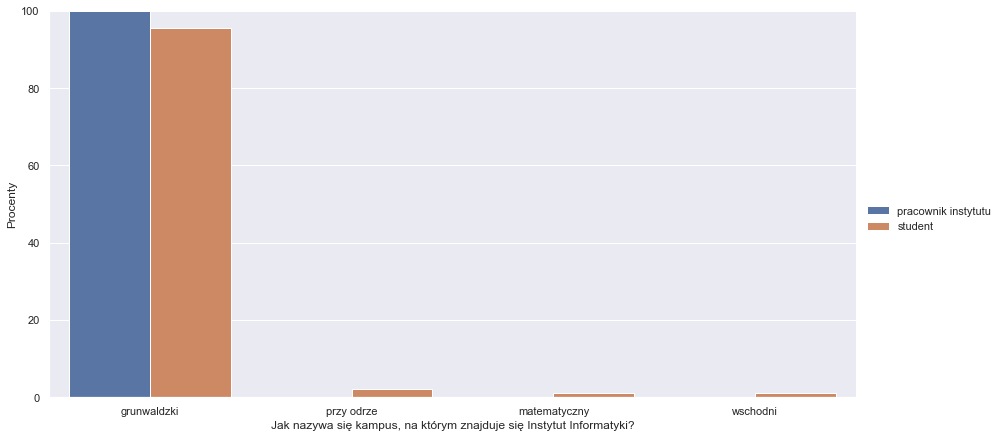

In [90]:
x = 57
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    58
pracownik instytutu  7     88.888889
                     8      5.555556
                     9      5.555556
student              8     43.333333
                     7     32.222222
                     9     17.777778
                     10     6.666667
Name: 58, dtype: float64


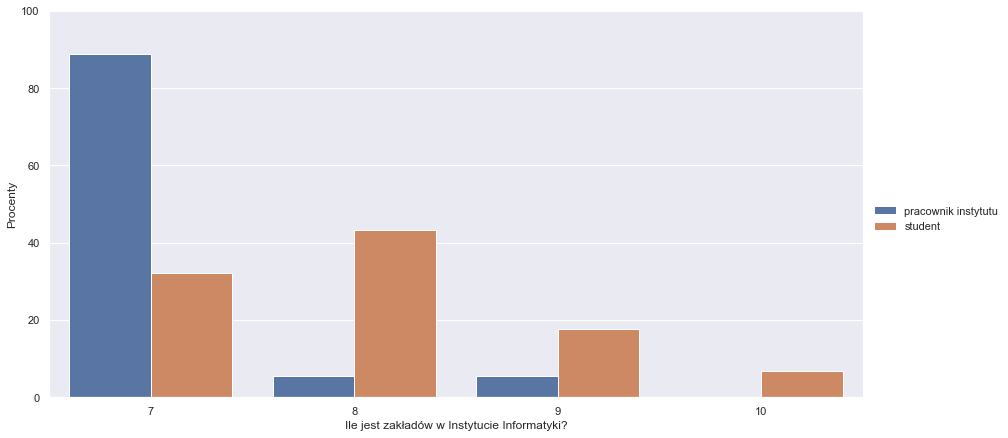

In [91]:
x = 58
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    59                                             
pracownik instytutu  pracownia grafiki komputerowej                     66.666667
                     pracownia metod numerycznych                       11.111111
                     pracownia optymalizacji kombinatorycznej           11.111111
                     pracownia zlozonosci obliczeniowej i algorytmow    11.111111
student              pracownia zlozonosci obliczeniowej i algorytmow    43.333333
                     pracownia grafiki komputerowej                     32.222222
                     pracownia metod numerycznych                       17.777778
                     pracownia optymalizacji kombinatorycznej            6.666667
Name: 59, dtype: float64


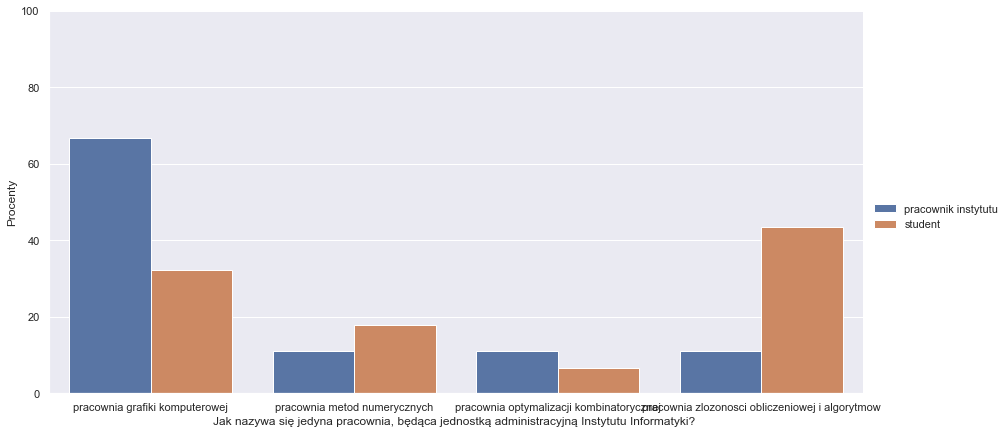

In [92]:
x = 59
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [93]:
keywords = ['whitebook', 'white book', 'weißbuch', 'biala ksiazka', 'biala ksiazeczka']

for row in df[60]:
    if any(keyword in row for keyword in keywords):
        df[60] = df[60].replace(row, 'whitebook')
        df_plot[60] = df_plot[60].replace(row, 'whitebook')
    else:
        df_plot[60] = df_plot[60].replace(row, 'nie wiem/inne')
        
#df[60].value_counts()

0                    60           
pracownik instytutu  whitebook        66.666667
                     nie wiem/inne    33.333333
student              whitebook        83.333333
                     nie wiem/inne    16.666667
Name: 60, dtype: float64


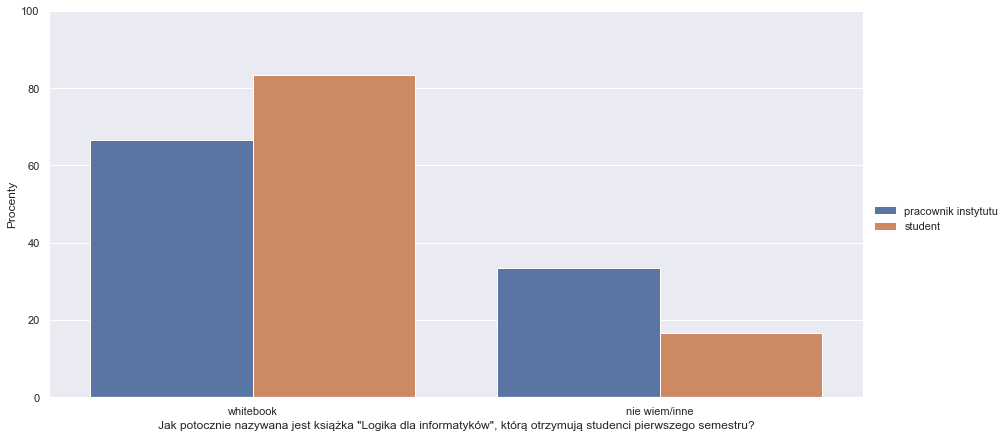

In [94]:
x = 60
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

# Transformacja danych

In [95]:
dane = df_plot.copy()

In [96]:
pytania_student = [3, 4, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 21, 22, 23, 27, 28, 29, 30,
                   31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 60]

pytania_pracownik = [2, 5, 7, 14, 19, 20, 24, 25, 26, 34, 43, 44, 52, 53, 54, 55, 56, 57, 58, 59]

print(len(pytania_student))
print(len(pytania_pracownik))

ratio_pytan = len(pytania_student) / len(pytania_pracownik)
print(ratio_pytan)

39
20
1.95


In [97]:
for pytanie in pytania_student:
    print(pytanie, ":", numbers_to_questions[pytanie])

3 : Kto prowadzi przedmiot, na którym nauczysz się tworzyć modele w SketchUpie?
4 : Jakie jest najpopularniejsze miejsce we Wrocławiu, gdzie możesz legalnie napić się piwa na świeżym powietrzu?
6 : Jaka jest pełna nazwa skrótowca ISIM?
8 : Ile przedmiotów obowiązkowych jest na I stopniu studiów (licencjat/inżynier)?
9 : Jakim jednym przedmiotem można zaliczyć efekty kształcenia SO (systemy operacyjne) i ASK (architektura systemów komputerowych)?
10 : Jak nazywa się coroczny, zimowy obóz organizowany przez studentów Instytutu Informatyki?
11 : Gdy student zadeklaruje zadanie, którego nie zrobił, to może dostać za nie dużego…
12 : W jakiej zakładce w USOS sprawdzisz swoje oceny końcowe z przedmiotów?
13 : Wymień 2 przedmioty, które można zdawać na 2 poziomach (licencjackim i magisterskim)? 
15 : Ile wynosi kaucja za kluczyk do szafki?
16 : Ile wynosi kaucja za pilota do parkingu?
17 : Który przedmiot jest uważany za najtrudniejszy do zdania na I stopniu studiów i dużo studentów go powtar

In [98]:
for pytanie in pytania_pracownik:
    print(pytanie, ":", numbers_to_questions[pytanie])

2 : Jaki adres ma Instytut Informatyki (nazwa ulicy i numer)?
5 : Kto jest najwyżej w hierarchii władzy uczelnianej?
7 : Na co dzieli się administracyjnie Instytut Informatyki?
14 : Jaki inny instytut UWr spoza naszego wydziału ma również zajęcia w budynku naszego instytutu?
19 : Jak nazywa się ulica od strony parkingu ze szlabanem przy Instytucie Informatyki?
20 : Jak nazywa się pizzeria, gdzie zjesz najtańszą pizzę koło Instytutu Informatyki?
24 : Kto jest dyrektorem Instytutu Informatyki?
25 : Ilu zastępców ma dyrektor Instytutu Informatyki?
26 : Jak nazywa się restauracja w budynku Instytutu Informatyki?
34 : Jak nazywa się wydział, do którego należy Instytut Informatyki?
43 : Jak nazywa się przystanek autobusowo-tramwajowy przy Instytucie Informatyki?
44 : Jak nazywa się ministerstwo, pod które podlega UWr?
52 : Ile kondygnacji ma Instytut Informatyki?
53 : Jak nazywa się dziekan naszego wydziału?
54 : Jak nazywa się zastępca dziekana (nazwa stanowiska)?
55 : W jakich latach budow

In [99]:
for col in dane.columns:
    for row in dane[col]:
        if row == 'nie wiem/inne':
            dane[col] = dane[col].replace(row, False)

#dane[0] = dane[0].replace('student', 1)
#dane[0] = dane[0].replace('pracownik instytutu', 0)

dane = dane.fillna('pracownik')
dane[1] = dane[1].replace('1-2', 'student (1-2)')
dane[1] = dane[1].replace('3-4', 'student (3-4)')
dane[1] = dane[1].replace('5-6', 'student (5-6)')
dane[1] = dane[1].replace('7+', 'student (7+)')

dane[2] = dane[2].replace('joliot-curie 15', True)
dane[2] = dane[2].replace('joliot-curie', False)

dane[3] = dane[3].replace('lukasz piwowar', True)
dane[3] = dane[3].replace('wiktor zychla', False)
dane[3] = dane[3].replace('jakub kowalski', False)
dane[3] = dane[3].replace('marcin mlotkowski', False)

dane[4] = dane[4].replace('wyspa slodowa', True)

dane[5] = dane[5].replace('rektor', True)
dane[5] = dane[5].replace('dziekan', False)
dane[5] = dane[5].replace('dyrektor', False)
dane[5] = dane[5].replace('prodziekan', False)

dane[6] = dane[6].replace('indywidualne studia informatyczno-matematyczne', True)
dane[6] = dane[6].replace('indywidualne studia inf-mat', False)

dane[7] = dane[7].replace('zaklady', True)
dane[7] = dane[7].replace('wydzialy', False)
dane[7] = dane[7].replace('katedry', False)
dane[7] = dane[7].replace('zespoly', False)

dane[8] = dane[8].replace(7, True)
dane[8] = dane[8].replace(6, False)
dane[8] = dane[8].replace(8, False)
dane[8] = dane[8].replace(9, False)

dane[9] = dane[9].replace('syk (systemy komputerowe)', True)

dane[10] = dane[10].replace('zosia (zimowy oboz studentow informatyki a)', True)

dane[11] = dane[11].replace('grzyba', True)

dane[12] = dane[12].replace('oceny koncowe', True)
dane[12] = dane[12].replace('zaliczenia etapow', False)
dane[12] = dane[12].replace('sprawdziany', False)
dane[12] = dane[12].replace('semestry', False)

dane[13] = dane[13].replace('an, md', True)
dane[13] = dane[13].replace('aisd, md', True)
dane[13] = dane[13].replace('aisd, an', True)

dane[14] = dane[14].replace('dziennikarstwa', True)

dane[15] = dane[15].replace(20, True)
dane[15] = dane[15].replace(50, False)
dane[15] = dane[15].replace(10, False)
dane[15] = dane[15].replace(30, False)

dane[16] = dane[16].replace(100, True)
dane[16] = dane[16].replace(50, False)
dane[16] = dane[16].replace(200, False)
dane[16] = dane[16].replace(20, False)

dane[17] = dane[17].replace('aisd', True)

dane[18] = dane[18].replace(4, True)
dane[18] = dane[18].replace(5, False)
dane[18] = dane[18].replace(3, False)
dane[18] = dane[18].replace(6, False)

dane[19] = dane[19].replace('benedykta polaka', True)

dane[20] = dane[20].replace('bravo', True)

dane[21] = dane[21].replace('kolo studentow informatyki', True)

dane[22] = dane[22].replace(35, True)
dane[22] = dane[22].replace(30, False)
dane[22] = dane[22].replace(40, False)
dane[22] = dane[22].replace(45, False)

dane[23] = dane[23].replace(45, True)
dane[23] = dane[23].replace(60, False)
dane[23] = dane[23].replace(50, False)
dane[23] = dane[23].replace(40, False)

dane[24] = dane[24].replace('jerzy marcinkowski', True)

dane[25] = dane[25].replace(1, False)
dane[25] = dane[25].replace(4, True)
dane[25] = dane[25].replace(2, False)
dane[25] = dane[25].replace(3, False)

dane[26] = dane[26].replace('plastyczna', True)

dane[27] = dane[27].replace(24, True)
dane[27] = dane[27].replace(48, False)
dane[27] = dane[27].replace(12, False)
dane[27] = dane[27].replace(36, False)

dane[28] = dane[28].replace(1, False)
dane[28] = dane[28].replace(3, True)
dane[28] = dane[28].replace(5, False)
dane[28] = dane[28].replace(10, False)

dane[29] = dane[29].replace('lukasz piwowar', True)
dane[29] = dane[29].replace('wiktor zychla', False)
dane[29] = dane[29].replace('jakub kowalski', False)
dane[29] = dane[29].replace('marcin mlotkowski', False)

dane[30] = dane[30].replace('osoba ukryla swoje dane osobowe', True)
dane[30] = dane[30].replace('osoba jest z erasmusa', False)
dane[30] = dane[30].replace('osoba jest doktorantem', False)
dane[30] = dane[30].replace('osoba już nie studiuje', False)

dane[31] = dane[31].replace(24, True)
dane[31] = dane[31].replace(12, False)
dane[31] = dane[31].replace(72, False)
dane[31] = dane[31].replace(48, False)

dane[32] = dane[32].replace('sprawdziany', True)
dane[32] = dane[32].replace('listy zadan', False)
dane[32] = dane[32].replace('zaliczenia etapow', False)
dane[32] = dane[32].replace('oceny koncowe', False)

dane[33] = dane[33].replace('do kolejki', True)
dane[33] = dane[33].replace('do listy oczekujacych', False)
dane[33] = dane[33].replace('do listy rezerwowej', False)
dane[33] = dane[33].replace('nie jest to mozliwe', False)

dane[34] = dane[34].replace('wydzial matematyki i informatyki', True)
dane[34] = dane[34].replace('wydzial informatyki i matematyki', False)

dane[35] = dane[35].replace(6, True)
dane[35] = dane[35].replace(5, False)
dane[35] = dane[35].replace(7, False)
dane[35] = dane[35].replace(8, False)

dane[36] = dane[36].replace('sieci komputerowe', True)
dane[36] = dane[36].replace('systemy komputerowe', False)

dane[37] = dane[37].replace('projektowanie obiektowe oprogramowania', True)
dane[37] = dane[37].replace('programowanie obiektowe oprogramowania', False)
dane[37] = dane[37].replace('projektowanie oprogramowania obiektowego', False)

dane[38] = dane[38].replace('komunikacja czlowiek-komputer', True)

dane[39] = dane[39].replace('rachunek prawdopodobienstwa i statystyka', True)

dane[40] = dane[40].replace('zdzislaw ploski', True)
dane[40] = dane[40].replace('pawel laskos-grabowski', False)
dane[40] = dane[40].replace('bartosz bednarczyk', False)
dane[40] = dane[40].replace('rafal nowak', False)

dane[41] = dane[41].replace('moje konto', True)
dane[41] = dane[41].replace('zaliczenia', False)
dane[41] = dane[41].replace('moj profil', False)
dane[41] = dane[41].replace('wyniki', False)

dane[42] = dane[42].replace('testowanie gier', True)
dane[42] = dane[42].replace('sztuczna inteligencja', False)
dane[42] = dane[42].replace('ai4games', False)
dane[42] = dane[42].replace('unity', False)

dane[43] = dane[43].replace('most grunwaldzki', True)

dane[44] = dane[44].replace('ministerstwo nauki i szkolnictwa wyzszego', True)
dane[44] = dane[44].replace('ministerstwo edukacji', False)
dane[44] = dane[44].replace('ministerstwo edukacji i nauki', False)
dane[44] = dane[44].replace('ministerstwo szkolnictwa wyzszego', False)
dane[44] = dane[44].replace('ministerstwo edukacji i szkolnictwa wyzszego', False)

dane[45] = dane[45].replace('piatek', True)
dane[45] = dane[45].replace('jest otwarty od poniedzialku do piatku', False)
dane[45] = dane[45].replace('sroda', False)
dane[45] = dane[45].replace('poniedzialek', False)

dane[46] = dane[46].replace('golebnik', True)
dane[46] = dane[46].replace('szafka', False)
dane[46] = dane[46].replace('polka', False)

dane[47] = dane[47].replace('zielony', True)
dane[47] = dane[47].replace('niebieski', True)  #dodana odpowiedz
dane[47] = dane[47].replace('szary', False)
dane[47] = dane[47].replace('bialy', False)

dane[48] = dane[48].replace(2, True)
dane[48] = dane[48].replace(3, False)
dane[48] = dane[48].replace(4, False)
dane[48] = dane[48].replace(5, False)

dane[49] = dane[49].replace('system komunikacji na odleglosc ze studentami', True)
dane[49] = dane[49].replace('system komunikacji...', False)
dane[49] = dane[49].replace('system ksztalcenia...', False)

dane[50] = dane[50].replace('metody programowania', True)

dane[51] = dane[51].replace('alpaki', True)
dane[51] = dane[51].replace('psy', False)
dane[51] = dane[51].replace('koty', False)
dane[51] = dane[51].replace('kozy', False)

dane[52] = dane[52].replace(5, True)
dane[52] = dane[52].replace(4, False)
dane[52] = dane[52].replace(3, False)
dane[52] = dane[52].replace(2, False)


dane[53] = dane[53].replace('tomasz jurdzinski', True)

dane[54] = dane[54].replace('prodziekan', True)

dane[55] = dane[55].replace('2004-2006', True)
dane[55] = dane[55].replace('2008-2010', False)
dane[55] = dane[55].replace('2000-2002', False)
dane[55] = dane[55].replace('2012-2014', False)

dane[56] = dane[56].replace('robert olkiewicz', True)
dane[56] = dane[56].replace('przemyslaw wiszewski', False)

dane[57] = dane[57].replace('grunwaldzki', True)
dane[57] = dane[57].replace('matematyczny', False)
dane[57] = dane[57].replace('wschodni', False)
dane[57] = dane[57].replace('przy odrze', False)

dane[58] = dane[58].replace(7, True)
dane[58] = dane[58].replace(8, False)
dane[58] = dane[58].replace(9, False)
dane[58] = dane[58].replace(10, False)

dane[59] = dane[59].replace('pracownia grafiki komputerowej', True)
dane[59] = dane[59].replace('pracownia zlozonosci obliczeniowej i algorytmow', False)
dane[59] = dane[59].replace('pracownia metod numerycznych', False)
dane[59] = dane[59].replace('pracownia optymalizacji kombinatorycznej', False)

dane[60] = dane[60].replace('whitebook', True)

In [100]:
for index, row in dane.iterrows():
    dobrze_suma_student = 0
    dobrze_suma_pracownik = 0
    for pytanie in pytania_student:
        dobrze_suma_student += row[pytanie]
    for pytanie in pytania_pracownik:
        dobrze_suma_pracownik += row[pytanie]
    dane.loc[index, 'suma student'] = dobrze_suma_student
    dane.loc[index, 'suma pracownik'] = dobrze_suma_pracownik
    niepoprawnie_suma_pracownik = (len(pytania_pracownik) - dobrze_suma_pracownik)
    dane.loc[index, 'suma razem'] = dobrze_suma_student + niepoprawnie_suma_pracownik
    dane.loc[index, 'ratio'] = dobrze_suma_pracownik / dobrze_suma_student

# Znajdywanie elementów odstających (outlierów)

In [101]:
dane['suma student'].sort_values()

44      1.0
14      9.0
106    13.0
22     18.0
37     18.0
40     19.0
36     21.0
73     21.0
39     22.0
12     22.0
98     23.0
32     23.0
19     23.0
34     23.0
13     24.0
76     25.0
97     25.0
104    25.0
27     25.0
25     26.0
68     26.0
107    26.0
31     26.0
28     26.0
35     26.0
10     26.0
42     26.0
21     26.0
29     26.0
30     27.0
23     27.0
83     27.0
9      27.0
90     27.0
101    27.0
18     27.0
33     28.0
15     28.0
38     28.0
62     28.0
1      28.0
47     28.0
79     29.0
88     29.0
93     29.0
105    29.0
58     29.0
53     29.0
20     29.0
92     30.0
2      30.0
94     30.0
11     30.0
102    30.0
17     30.0
46     30.0
67     30.0
7      31.0
95     31.0
16     31.0
78     31.0
24     31.0
91     31.0
64     31.0
0      31.0
55     31.0
56     31.0
50     31.0
63     31.0
43     31.0
59     31.0
60     31.0
80     32.0
6      32.0
5      32.0
99     32.0
41     32.0
100    32.0
82     32.0
85     33.0
45     33.0
84     33.0
70     33.0
51  

In [102]:
dane['suma student'].median()

30.0

In [103]:
posortowane_dane = dane['suma student'].sort_values()
IQR = iqr(posortowane_dane)
print(IQR)
Q1 = np.quantile(posortowane_dane, q=0.25)
print(Q1)
Q3 = np.quantile(posortowane_dane, q=0.75)
print(Q3)
gorna_granica = Q3 + (1.5 * IQR)
print(gorna_granica)
dolna_granica = Q1 - (1.5 * IQR)
print(dolna_granica)

7.0
26.0
33.0
43.5
15.5


Text(0.5, 0, 'Liczba punktów za pytania studenckie')

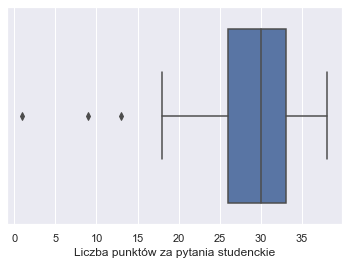

In [104]:
sns.boxplot(x=dane['suma student'])  #boxplot
plt.xlabel('Liczba punktów za pytania studenckie')

Text(0.5, 0, 'Liczba punktów za pytania studenckie')

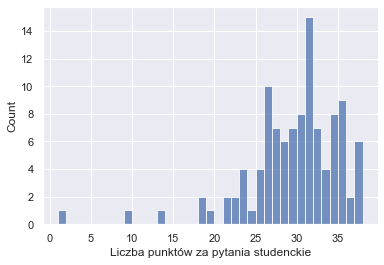

In [105]:
sns.histplot(data=dane, x='suma student', binwidth=1)
plt.xlabel('Liczba punktów za pytania studenckie')

In [106]:
dane['suma pracownik'].sort_values()  

37      4.0
63      4.0
99      4.0
90      5.0
70      5.0
39      6.0
25      6.0
88      6.0
44      6.0
76      6.0
34      6.0
69      6.0
98      7.0
27      7.0
60      7.0
21      7.0
6       7.0
22      7.0
46      7.0
50      7.0
100     7.0
32      8.0
83      8.0
59      8.0
84      8.0
86      8.0
47      8.0
101     8.0
38      8.0
35      8.0
67      8.0
33      8.0
42      9.0
77      9.0
68      9.0
95      9.0
2       9.0
94      9.0
87      9.0
19      9.0
92      9.0
89      9.0
30     10.0
31     10.0
79     10.0
72     10.0
56     10.0
43     10.0
23     10.0
1      10.0
36     10.0
73     10.0
5      11.0
71     11.0
10     11.0
58     11.0
62     11.0
51     11.0
106    11.0
91     11.0
45     11.0
26     11.0
28     11.0
29     11.0
0      11.0
78     12.0
82     12.0
102    12.0
97     12.0
53     12.0
24     12.0
48     12.0
49     12.0
55     12.0
11     12.0
7      12.0
3      12.0
75     13.0
57     13.0
54     13.0
96     13.0
81     13.0
41     13.0
8   

Text(0.5, 0, 'Liczba punktów za pytania pracownicze')

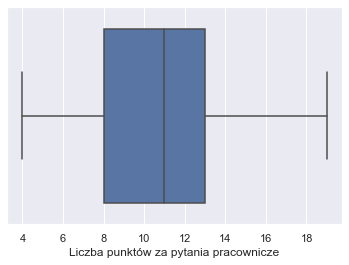

In [107]:
sns.boxplot(x=dane['suma pracownik'])  #boxplot
plt.xlabel('Liczba punktów za pytania pracownicze')

Text(0.5, 0, 'Liczba punktów za pytania pracownicze')

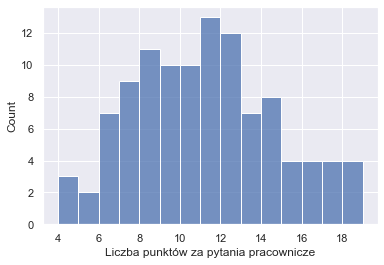

In [108]:
sns.histplot(data=dane, x='suma pracownik', binwidth=1)
plt.xlabel('Liczba punktów za pytania pracownicze')

In [109]:
dane['suma razem'].sort_values()  

14     14.0
44     15.0
40     22.0
106    22.0
12     26.0
107    28.0
104    28.0
18     28.0
13     29.0
22     31.0
15     31.0
36     31.0
73     31.0
9      32.0
16     33.0
20     33.0
97     33.0
105    33.0
37     34.0
19     34.0
64     34.0
10     35.0
32     35.0
29     35.0
28     35.0
17     35.0
93     35.0
98     36.0
39     36.0
31     36.0
80     36.0
103    36.0
42     37.0
68     37.0
62     37.0
53     37.0
34     37.0
30     37.0
23     37.0
1      38.0
102    38.0
27     38.0
11     38.0
35     38.0
58     38.0
21     39.0
55     39.0
24     39.0
76     39.0
7      39.0
79     39.0
83     39.0
85     39.0
101    39.0
41     39.0
78     39.0
82     40.0
65     40.0
91     40.0
61     40.0
0      40.0
33     40.0
47     40.0
25     40.0
38     40.0
74     41.0
92     41.0
94     41.0
5      41.0
43     41.0
81     41.0
2      41.0
56     41.0
57     41.0
54     42.0
90     42.0
75     42.0
96     42.0
95     42.0
67     42.0
45     42.0
46     43.0
59     43.0
51  

In [110]:
posortowane_dane = dane['suma razem'].sort_values()
posortowane_dane.median()

39.0

Text(0.5, 0, 'Liczba punktów razem')

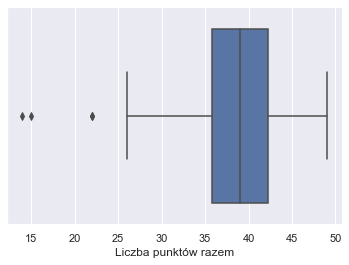

In [111]:
sns.boxplot(x=dane['suma razem'])
plt.xlabel('Liczba punktów razem')

In [112]:
IQR = iqr(posortowane_dane)
print(IQR)
Q1 = np.quantile(posortowane_dane, q=0.25)
print(Q1)
Q3 = np.quantile(posortowane_dane, q=0.75)
print(Q3)
gorna_granica = Q3 + (1.5 * IQR)
print(gorna_granica)
dolna_granica = Q1 - (1.5 * IQR)
print(dolna_granica)

6.5
35.75
42.25
52.0
26.0


In [113]:
for index, row in dane.iterrows():
    if (row['suma razem'] > gorna_granica or row['suma razem'] < dolna_granica):
        print('suma pkt = ', row['suma razem'], ', index = ', index)

suma pkt =  14.0 , index =  14
suma pkt =  22.0 , index =  40
suma pkt =  15.0 , index =  44
suma pkt =  22.0 , index =  106


Text(0.5, 0, 'Liczba punktów razem')

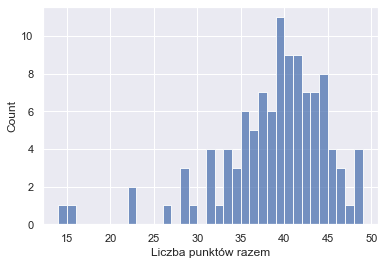

In [114]:
sns.histplot(data=dane, x='suma razem', binwidth=1)
plt.xlabel('Liczba punktów razem')

In [115]:
#Odrzucenie wiersza 102 i 104 (respondenci specjalnie źle wypełnili ankiete)

dane = dane.drop([14, 44])

# Statystyki

In [116]:
srednia = dane.groupby([0]).mean()
srednia_student = srednia['suma razem'][1]
srednia_pracownik = srednia['suma razem'][0]
srednia

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,suma student,suma pracownik,suma razem,ratio
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
pracownik instytutu,0.764706,0.882353,0.588235,0.941176,0.705882,1.000000,0.470588,0.470588,1.000000,1.000000,0.529412,0.823529,1.000000,0.352941,0.529412,0.823529,0.647059,0.647059,0.764706,0.941176,0.823529,0.235294,1.000000,0.470588,0.941176,0.764706,0.941176,0.764706,0.882353,0.470588,0.823529,0.882353,1.000000,0.882353,0.352941,0.647059,0.705882,0.823529,1.000000,0.352941,0.117647,0.823529,0.117647,0.294118,0.000000,0.941176,0.882353,0.176471,0.470588,0.941176,0.235294,0.882353,0.588235,0.823529,0.470588,1.000000,0.882353,0.647059,0.705882,25.647059,15.00000,30.647059,0.599863
student,0.292135,0.808989,0.921348,0.932584,0.775281,0.662921,0.786517,0.808989,0.966292,0.977528,0.775281,0.865169,0.921348,0.674157,0.674157,0.955056,0.752809,0.269663,0.573034,0.842697,0.820225,0.528090,0.438202,0.078652,0.797753,0.820225,0.966292,0.730337,0.988764,0.865169,0.898876,0.932584,0.775281,0.966292,0.573034,0.471910,0.741573,0.910112,0.865169,0.404494,0.629213,0.842697,0.033708,0.640449,0.067416,0.977528,0.943820,0.337079,0.966292,0.831461,0.033708,0.584270,0.561798,0.516854,0.033708,0.955056,0.325843,0.314607,0.842697,30.303371,9.94382,40.359551,0.328293


In [117]:
mediana = dane.groupby([0]).median()
mediana

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,suma student,suma pracownik,suma razem,ratio
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
pracownik instytutu,True,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,True,True,False,True,True,True,True,26.0,16.0,31.0,0.580645
student,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,False,True,False,True,True,False,True,True,False,True,True,True,False,True,False,False,True,31.0,10.0,40.0,0.333333


In [118]:
war = dane.groupby([0]).var()
war

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,suma student,suma pracownik,suma razem,ratio
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
pracownik instytutu,0.191176,0.110294,0.257353,0.058824,0.220588,0.000000,0.264706,0.264706,0.000000,0.000000,0.264706,0.154412,0.000000,0.242647,0.264706,0.154412,0.242647,0.242647,0.191176,0.058824,0.154412,0.191176,0.000000,0.264706,0.058824,0.191176,0.058824,0.191176,0.110294,0.264706,0.154412,0.110294,0.0000,0.110294,0.242647,0.242647,0.220588,0.154412,0.000000,0.242647,0.110294,0.154412,0.110294,0.220588,0.000000,0.058824,0.110294,0.154412,0.264706,0.058824,0.191176,0.110294,0.257353,0.154412,0.264706,0.000000,0.110294,0.242647,0.220588,26.492647,10.375000,21.242647,0.021134
student,0.209142,0.156282,0.073289,0.063585,0.176200,0.225996,0.169816,0.156282,0.032942,0.022217,0.176200,0.117978,0.073289,0.222165,0.222165,0.043412,0.188202,0.199183,0.247446,0.134065,0.149132,0.252043,0.248979,0.073289,0.163177,0.149132,0.032942,0.199183,0.011236,0.117978,0.091931,0.063585,0.1762,0.032942,0.247446,0.252043,0.193820,0.082737,0.117978,0.243616,0.235955,0.134065,0.032942,0.232891,0.063585,0.022217,0.053626,0.225996,0.032942,0.141726,0.032942,0.245659,0.248979,0.252554,0.032942,0.043412,0.222165,0.218080,0.134065,18.554648,8.576353,15.187436,0.007287


In [119]:
std = dane.groupby([0]).std()
std_student = std['suma razem'][1]
std_pracownik = std['suma razem'][0]
std

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,suma student,suma pracownik,suma razem,ratio
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
pracownik instytutu,0.437237,0.332106,0.50730,0.242536,0.469668,0.00000,0.514496,0.514496,0.000000,0.000000,0.514496,0.392953,0.00000,0.492592,0.514496,0.392953,0.492592,0.492592,0.437237,0.242536,0.392953,0.437237,0.000000,0.514496,0.242536,0.437237,0.242536,0.437237,0.332106,0.514496,0.392953,0.332106,0.000000,0.332106,0.492592,0.492592,0.469668,0.392953,0.000000,0.492592,0.332106,0.392953,0.332106,0.469668,0.000000,0.242536,0.332106,0.392953,0.514496,0.242536,0.437237,0.332106,0.507300,0.392953,0.514496,0.000000,0.332106,0.492592,0.469668,5.147101,3.221025,4.608975,0.145375
student,0.457320,0.395325,0.27072,0.252161,0.419762,0.47539,0.412088,0.395325,0.181499,0.149052,0.419762,0.343479,0.27072,0.471344,0.471344,0.208355,0.433823,0.446299,0.497440,0.366149,0.386176,0.502039,0.498978,0.270720,0.403951,0.386176,0.181499,0.446299,0.106000,0.343479,0.303200,0.252161,0.419762,0.181499,0.497440,0.502039,0.440250,0.287641,0.343479,0.493575,0.485752,0.366149,0.181499,0.482588,0.252161,0.149052,0.231573,0.475390,0.181499,0.376465,0.181499,0.495640,0.498978,0.502547,0.181499,0.208355,0.471344,0.466990,0.366149,4.307511,2.928541,3.897106,0.085363


# Suma punktów - rozkład normalny

<AxesSubplot:xlabel='suma razem', ylabel='Count'>

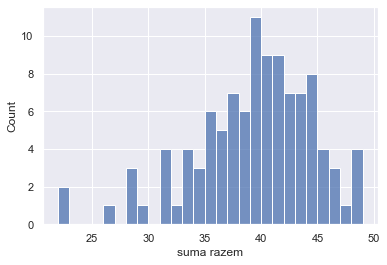

In [120]:
sns.histplot(data=dane, x='suma razem', binwidth=1)

In [121]:
loc, scale = stats.norm.fit(dane['suma razem'])
n = stats.norm(loc=loc, scale=scale)

stats.kstest(dane['suma razem'], n.cdf)

KstestResult(statistic=0.10913647236042523, pvalue=0.14857531256660728)

In [122]:
lilliefors(dane['suma razem'])

(0.10906654236753865, 0.004196871675815266)

In [123]:
stats.shapiro(dane['suma razem'])

ShapiroResult(statistic=0.9616065621376038, pvalue=0.0037258239462971687)

# Obalanie hipotezy zerowej

In [124]:
sumy_studentow = dane[dane[0] == 'student']['suma razem'].values
sumy_pracownikow = dane[dane[0] == 'pracownik instytutu']['suma razem'].values

In [125]:
var_student = dane[dane[0] == 'student']['suma razem'].var()
var_pracownik = dane[dane[0] == 'pracownik instytutu']['suma razem'].var()
print(var_student)
print(var_pracownik)

15.187436159346271
21.24264705882353


In [126]:
stats.levene(sumy_studentow, sumy_pracownikow)

LeveneResult(statistic=0.7277209711071094, pvalue=0.39558333761799913)

In [127]:
stats.ttest_ind(sumy_studentow, sumy_pracownikow, equal_var=True)  #T-test

# stosujemy t-test, a nie ANOVA bo mamy tylko 2 grupy

Ttest_indResult(statistic=9.13961813893567, pvalue=5.6074661478470695e-15)

# Wykresy

Text(0, 0.5, 'Liczba poprawnych odpowiedzi na pytania pracownicze')

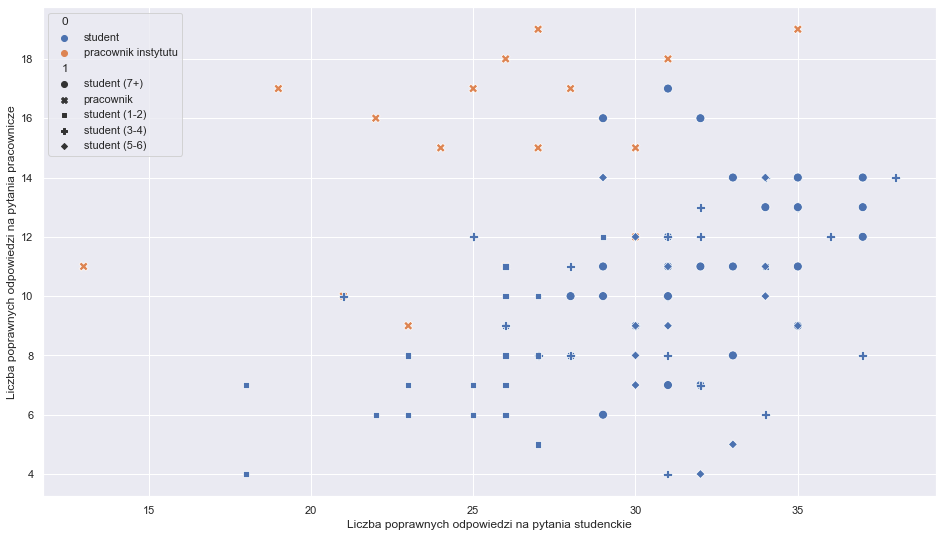

In [128]:
sns.set(rc={'figure.figsize':(16,9)})
sns.scatterplot(x='suma student', y='suma pracownik', hue=0, data=dane, style=1, s=80)
plt.xlabel('Liczba poprawnych odpowiedzi na pytania studenckie')
plt.ylabel('Liczba poprawnych odpowiedzi na pytania pracownicze')

<AxesSubplot:xlabel='suma razem', ylabel='ratio'>

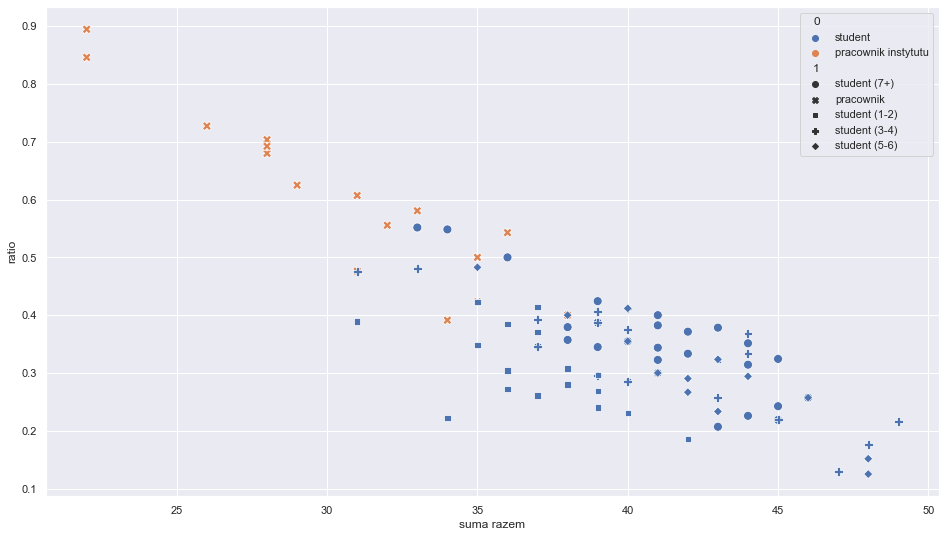

In [129]:
sns.scatterplot(x='suma razem', y='ratio', hue=0, data=dane, style=1, s=80)

Text(0.5, 0, 'Nr respondenta')

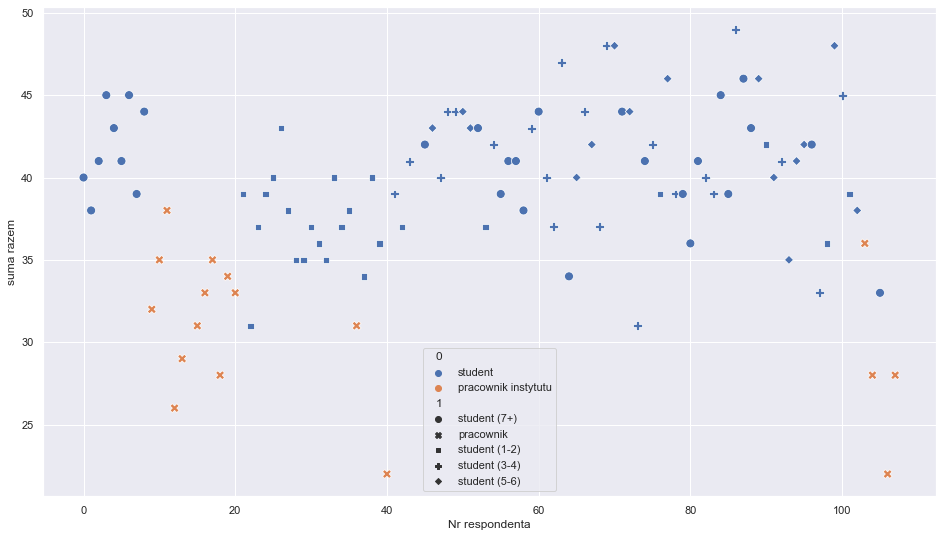

In [130]:
sns.scatterplot(x=dane.index, y='suma razem', hue=0, data=dane, style=1, s=80)
plt.xlabel('Nr respondenta')

# Transformacja danych i wykresy

In [131]:
dane_do_modelu = dane.copy()

dane_do_modelu[0] = dane_do_modelu[0].replace('student', 1)
dane_do_modelu[0] = dane_do_modelu[0].replace('pracownik instytutu', 0)

dane_do_modelu = dane_do_modelu.drop(1, axis=1)
dane_do_modelu = dane_do_modelu.drop('suma student', axis=1)
dane_do_modelu = dane_do_modelu.drop('suma pracownik', axis=1)
dane_do_modelu = dane_do_modelu.drop('suma razem', axis=1)
dane_do_modelu = dane_do_modelu.drop('ratio', axis=1)

In [132]:
dane_studenci = dane_do_modelu[dane_do_modelu[0] == 1]
dane_pracownicy = dane_do_modelu[dane_do_modelu[0] == 0]

<AxesSubplot:>

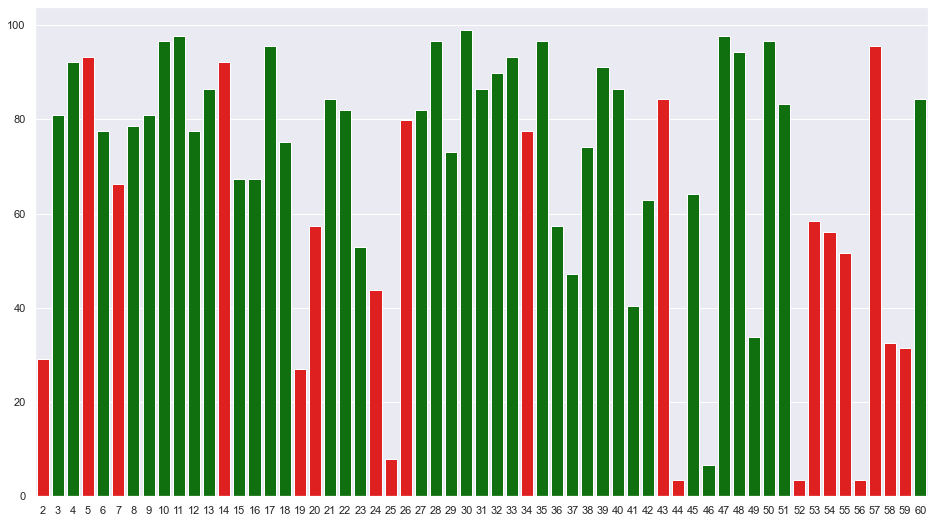

In [133]:
sns.barplot(x=dane_do_modelu.columns[1:], y=(dane_studenci.sum(axis=0)[1:] / dane_studenci.shape[0]) * 100,
            palette=[("green" if q in pytania_student else "red") for q in (dane_do_modelu.columns[1:])])

<AxesSubplot:>

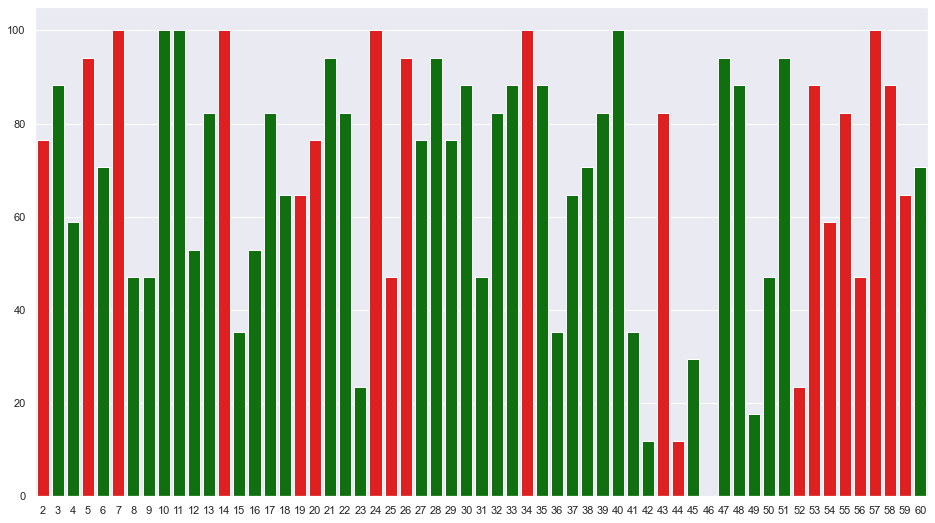

In [134]:
sns.barplot(x=dane_do_modelu.columns[1:], y=(dane_pracownicy.sum(axis=0)[1:] / dane_pracownicy.shape[0]) * 100,
            palette=[("green" if q in pytania_student else "red") for q in (dane_do_modelu.columns[1:])])

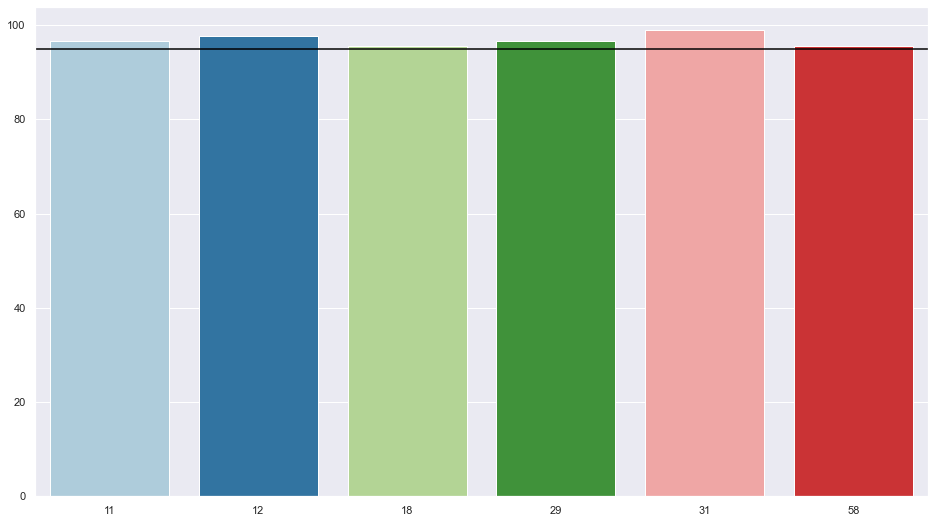

In [135]:
sns.barplot(x=dane_do_modelu.columns[[10, 11, 17, 28, 30, 57]],
            y=(dane_studenci[[10, 11, 17, 28, 30, 57]].sum(axis=0) / dane_studenci.shape[0]) * 100, palette="Paired")
plt.axhline(95, color='black')

In [136]:
for col in dane_do_modelu.columns:
    if col in pytania_pracownik:
        dane_do_modelu[col] = ~dane_do_modelu[col] * 1
    if col in pytania_student:
        dane_do_modelu[col] = dane_do_modelu[col] * 1

# Feature selection

In [137]:
y = dane_do_modelu[0]
x = dane_do_modelu.drop(0, axis=1)

<AxesSubplot:>

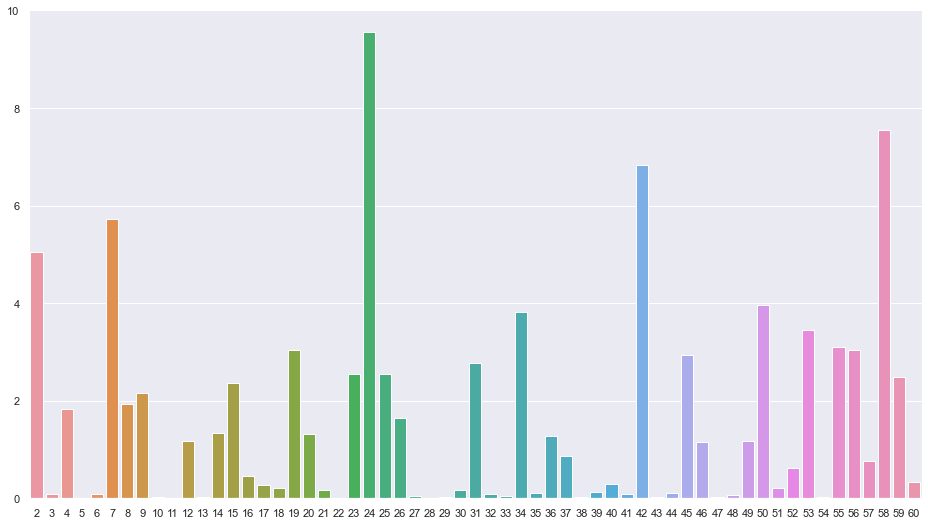

In [138]:
fs_chi = SelectKBest(chi2, k="all").fit(x, y)
sns.barplot(x=[i+2 for i in range(len(fs_chi.scores_))], y=fs_chi.scores_)

In [139]:
feature_scores_chi = []
i = 2

for score in fs_chi.scores_:
    feature_scores_chi.append((score, i))
    i = i + 1

sorted(feature_scores_chi)

[(0.00018992486572312305, 22),
 (0.007346585998271435, 11),
 (0.00935681609061324, 28),
 (0.01595694457558302, 5),
 (0.016690302170830278, 10),
 (0.019411058849196795, 47),
 (0.022912535800837165, 29),
 (0.022989166355355042, 54),
 (0.024708932838476815, 38),
 (0.02882708831155619, 13),
 (0.03269701800085538, 43),
 (0.03895490780581896, 33),
 (0.05422770100985243, 27),
 (0.05774199363095587, 48),
 (0.08996107806418416, 6),
 (0.09137826777854322, 32),
 (0.09360257082298248, 3),
 (0.09574166745349796, 41),
 (0.10554730291271022, 35),
 (0.10554730291271022, 44),
 (0.11939332799944306, 39),
 (0.16124721280041854, 21),
 (0.16633191948100243, 30),
 (0.2023646911948306, 51),
 (0.2169234158659143, 18),
 (0.26438208923337786, 17),
 (0.292612957207746, 40),
 (0.3255236228547985, 60),
 (0.4594097531538256, 16),
 (0.6210485556156407, 52),
 (0.7640449438202246, 57),
 (0.8757435558493061, 37),
 (1.146067415730337, 46),
 (1.1726066398901827, 12),
 (1.182659376314366, 49),
 (1.2858037360420218, 36),
 

In [140]:
pytania_do_zostawienia = sorted([b for a, b in feature_scores_chi if a >= 1.8])
print(len(pytania_do_zostawienia))

20


In [141]:
pytania_do_usuniecia = sorted([b for a, b in feature_scores_chi if a < 1.8])
print(len(pytania_do_usuniecia))

39


In [142]:
liczba_pyt_student = 0
liczba_pyt_pracownik = 0

for index in pytania_do_zostawienia:
    print(index, ": ", numbers_to_questions[index])
    if index in pytania_student:
        liczba_pyt_student = liczba_pyt_student + 1
    else:
        liczba_pyt_pracownik = liczba_pyt_pracownik + 1

print(liczba_pyt_student)
print(liczba_pyt_pracownik)

2 :  Jaki adres ma Instytut Informatyki (nazwa ulicy i numer)?
4 :  Jakie jest najpopularniejsze miejsce we Wrocławiu, gdzie możesz legalnie napić się piwa na świeżym powietrzu?
7 :  Na co dzieli się administracyjnie Instytut Informatyki?
8 :  Ile przedmiotów obowiązkowych jest na I stopniu studiów (licencjat/inżynier)?
9 :  Jakim jednym przedmiotem można zaliczyć efekty kształcenia SO (systemy operacyjne) i ASK (architektura systemów komputerowych)?
15 :  Ile wynosi kaucja za kluczyk do szafki?
19 :  Jak nazywa się ulica od strony parkingu ze szlabanem przy Instytucie Informatyki?
23 :  Jaki jest maksymalna liczba ECTS na semestr w systemie zapisów?
24 :  Kto jest dyrektorem Instytutu Informatyki?
25 :  Ilu zastępców ma dyrektor Instytutu Informatyki?
31 :  Ile godzin bonusu zapewnia jeden punkt oddany na dany przedmiot w głosowaniu?
34 :  Jak nazywa się wydział, do którego należy Instytut Informatyki?
42 :  Na jakim przedmiocie, aby go zdać, będziesz musiał grać w gry komputerowe?
45

# Tworzenie modelu

In [143]:
for pytanie in pytania_do_usuniecia:
    x = x.drop(pytanie, axis=1)

In [144]:
x = sm.add_constant(x)

# get Variance Inflation Factor (VIF) 
VIF = pd.DataFrame({'Nr pytania':x.columns[2:], 'VIF':[variance_inflation_factor(x.values, i+1) for i in range(len(x.columns[2:]))]})
VIF

,Nr pytania,VIF
0,4,1.472646
1,7,1.961690
2,8,1.605453
3,9,1.426355
4,15,2.148100
5,19,1.223715
6,23,1.696537
7,24,1.306425
8,25,1.826656
9,31,1.950947


<AxesSubplot:>

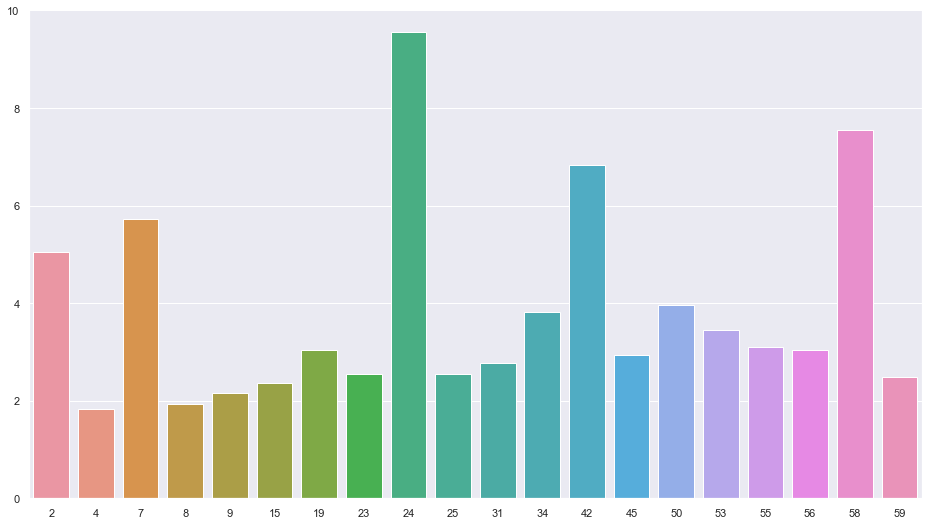

In [145]:
x = x.drop('const', axis=1)

fs_chi = SelectKBest(chi2, k="all").fit(x, y)
fs_chi.scores_
sns.barplot(x=[i for i in x.columns], y=fs_chi.scores_)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [147]:
sm = SMOTE(random_state=0)

x_res, y_res = sm.fit_resample(x_train, y_train)

In [148]:
model = LogisticRegression().fit(x_res, y_res)

In [149]:
model.coef_

array([[0.72595906, 0.53671964, 0.80653724, 0.58071404, 0.31228116,
        1.8095016 , 0.31686898, 0.37005931, 1.14687612, 0.72287022,
        0.81652559, 0.30020419, 1.0955764 , 1.05099832, 0.9024243 ,
        0.6303372 , 0.48300065, 1.25103608, 0.81035898, 0.07078173]])

In [150]:
y_prediction = model.predict(x_test)

In [151]:
accuracy_score(y_test, y_prediction)

1.0

In [152]:
precision_score(y_test, y_prediction)

1.0

In [153]:
student_questions = [4, 8, 9, 15, 23, 31, 42, 45, 50]
employee_questions = [2, 7, 19, 24, 25, 34, 53, 55, 56, 58, 59]

def get_employee_questions_part():
    mutually_exclusive_questions = [7, 58]
    normal_employee_questions = [q for q in employee_questions if q not in mutually_exclusive_questions]
        
    first_question = random.sample(mutually_exclusive_questions, 1)
    rest_of_question = random.sample(normal_employee_questions, 4)
        
    return first_question + rest_of_question


suma_acc = 0
suma_pre = 0

n = 1000

for i in range(0, n):
    student_questions_part = random.sample(student_questions, 5)
    employee_questions_part = get_employee_questions_part()
    questionnaire = student_questions_part + employee_questions_part
    random.shuffle(questionnaire)
    #print(questionnaire)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    sm = SMOTE(random_state=0)
    x_res, y_res = sm.fit_resample(x_train, y_train)
    model = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, random_state=0).fit(x_res, y_res)
    y_prediction = model.predict(x_test)
    suma_acc = suma_acc + accuracy_score(y_test, y_prediction)
    suma_pre = suma_pre + precision_score(y_test, y_prediction)
    if i % 100 == 0:
        print(i)
    
print(suma_acc / n)
print(suma_pre / n)

0
100
200
300
400
500
600
700
800
900
0.9452727272727324
0.9664062732288395


In [154]:
model.predict_proba(x_test)

array([[0.33142567, 0.66857433],
       [0.22627257, 0.77372743],
       [0.07053153, 0.92946847],
       [0.11210321, 0.88789679],
       [0.31720356, 0.68279644],
       [0.84002105, 0.15997895],
       [0.14051379, 0.85948621],
       [0.03513914, 0.96486086],
       [0.1385463 , 0.8614537 ],
       [0.23071376, 0.76928624],
       [0.18500399, 0.81499601],
       [0.06537658, 0.93462342],
       [0.49173809, 0.50826191],
       [0.27285443, 0.72714557],
       [0.20166453, 0.79833547],
       [0.515868  , 0.484132  ],
       [0.10290715, 0.89709285],
       [0.12174185, 0.87825815],
       [0.05191878, 0.94808122],
       [0.17572015, 0.82427985],
       [0.81631534, 0.18368466],
       [0.07761757, 0.92238243]])

In [155]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

# Testowanie

In [156]:
wyniki = []
i = 0

for item in model.predict_proba(x_test):
    if item[1] > 0.66:
        wyniki.append((1, y_test.tolist()[i]))
    else:
        wyniki.append((0, y_test.tolist()[i]))
    i = i + 1

wyniki

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1)]

In [157]:
sklearn.metrics.confusion_matrix(y_test, model.predict(x_test))

array([[ 3,  0],
       [ 0, 19]], dtype=int64)

In [158]:
x1 = x_train.copy()
x2 = x_res.copy()

for index, row in x_train.iterrows():
    dobrze_suma_student = 0
    dobrze_suma_pracownik = 0
    for pytanie in pytania_student:
        if pytanie in pytania_do_zostawienia:
            dobrze_suma_student += row[pytanie]
    for pytanie in pytania_pracownik:
        if pytanie in pytania_do_zostawienia:
            dobrze_suma_pracownik += row[pytanie]
    x1.loc[index, 'suma student'] = dobrze_suma_student
    x1.loc[index, 'suma pracownik'] = dobrze_suma_pracownik
    x1.loc[index, 'suma razem'] = dobrze_suma_student + dobrze_suma_pracownik
    
for index, row in x_res.iterrows():
    dobrze_suma_student = 0
    dobrze_suma_pracownik = 0
    for pytanie in pytania_student:
        if pytanie in pytania_do_zostawienia:
            dobrze_suma_student += row[pytanie]
    for pytanie in pytania_pracownik:
        if pytanie in pytania_do_zostawienia:
            dobrze_suma_pracownik += row[pytanie]
    x2.loc[index, 'suma student'] = dobrze_suma_student
    x2.loc[index, 'suma pracownik'] = dobrze_suma_pracownik
    x2.loc[index, 'suma razem'] = dobrze_suma_student + dobrze_suma_pracownik
    
x1['typ'] = y_train
x2['typ'] = y_res

In [159]:
x3 = x_test.copy()

for index, row in x_test.iterrows():
    dobrze_suma_student = 0
    dobrze_suma_pracownik = 0
    for pytanie in pytania_student:
        if pytanie in pytania_do_zostawienia:
            dobrze_suma_student += row[pytanie]
    for pytanie in pytania_pracownik:
        if pytanie in pytania_do_zostawienia:
            dobrze_suma_pracownik += row[pytanie]
    x3.loc[index, 'suma student'] = dobrze_suma_student
    x3.loc[index, 'suma pracownik'] = dobrze_suma_pracownik
    x3.loc[index, 'suma razem'] = dobrze_suma_student + dobrze_suma_pracownik
    
x3['typ'] = y_test

In [160]:
sns.set(rc={'figure.figsize':(16,9)})

(-5.0, 150.0)

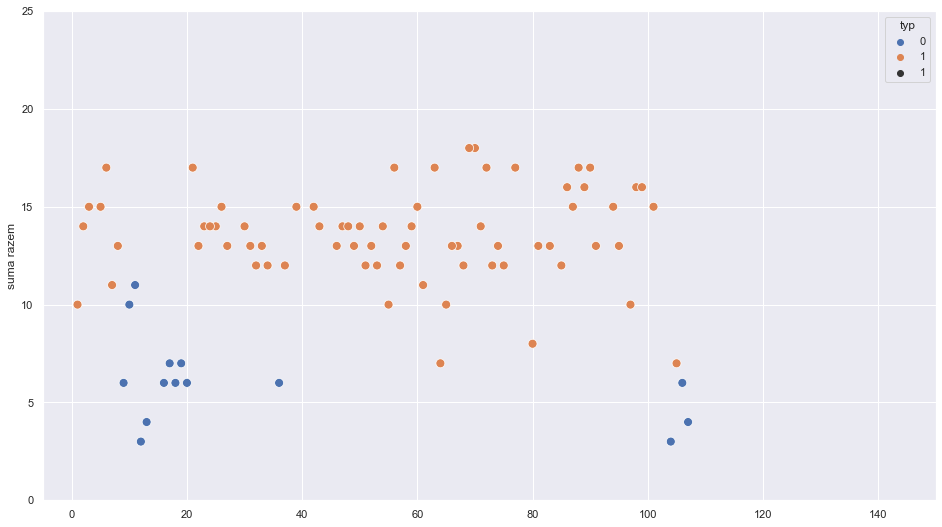

In [161]:
(sns.scatterplot(x=x1.index, y='suma razem', hue='typ', data=x1, style=1, s=80))
plt.ylim(0, 25)
plt.xlim(-5, 150)

(-5.0, 150.0)

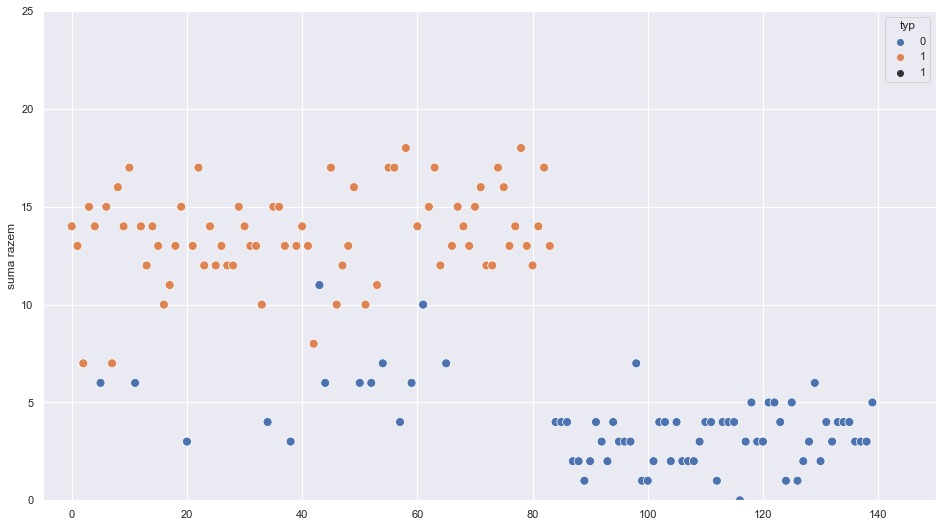

In [162]:
(sns.scatterplot(x=x2.index, y='suma razem', hue='typ', data=x2, style=1, s=80))
plt.ylim(0, 25)
plt.xlim(-5, 150)

(-5.0, 150.0)

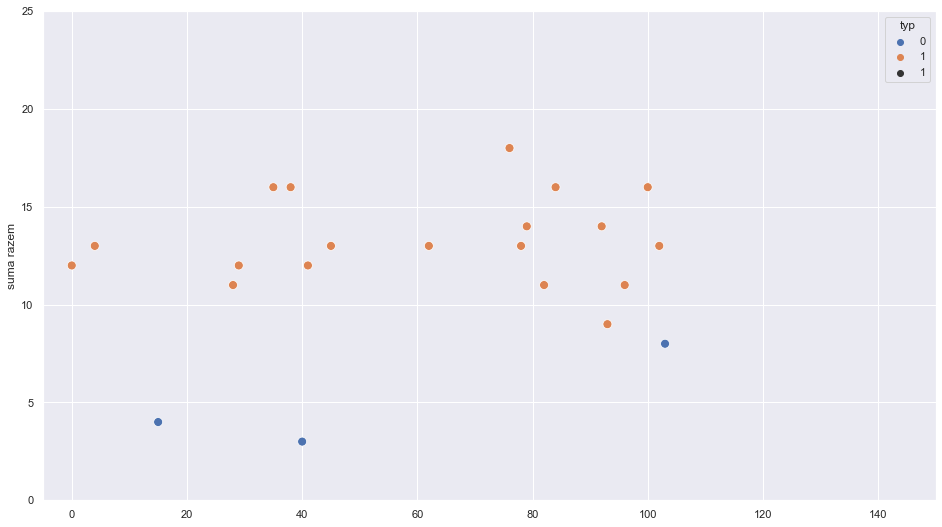

In [163]:
(sns.scatterplot(x=x3.index, y='suma razem', hue='typ', data=x3, style=1, s=80))
plt.ylim(0, 25)
plt.xlim(-5, 150)

(-5.0, 150.0)

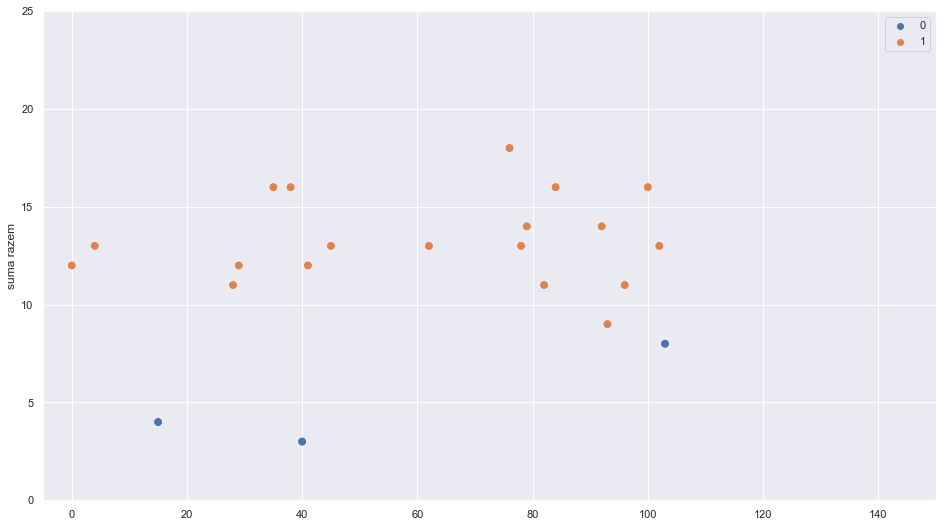

In [164]:
(sns.scatterplot(x=x3.index, y='suma razem', hue=y_prediction, data=x3, style=1, s=80))
plt.ylim(0, 25)
plt.xlim(-5, 150)

(-2.0, 15.0)

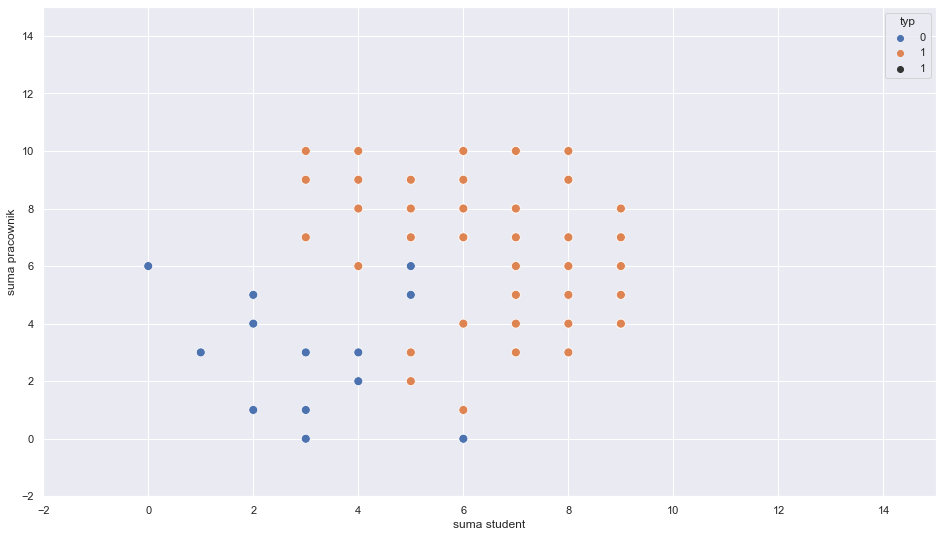

In [165]:
(sns.scatterplot(x='suma student', y='suma pracownik', hue='typ', data=x1, style=1, s=80))
plt.ylim(-2, 15)
plt.xlim(-2, 15)

(-2.0, 15.0)

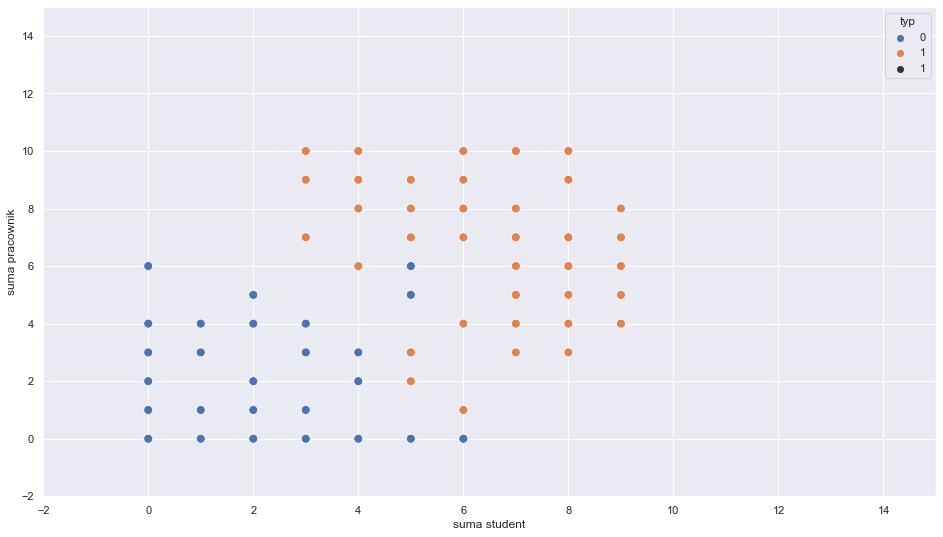

In [166]:
(sns.scatterplot(x='suma student', y='suma pracownik', hue='typ', data=x2, style=1, s=80))
plt.ylim(-2, 15)
plt.xlim(-2, 15)

(-2.0, 15.0)

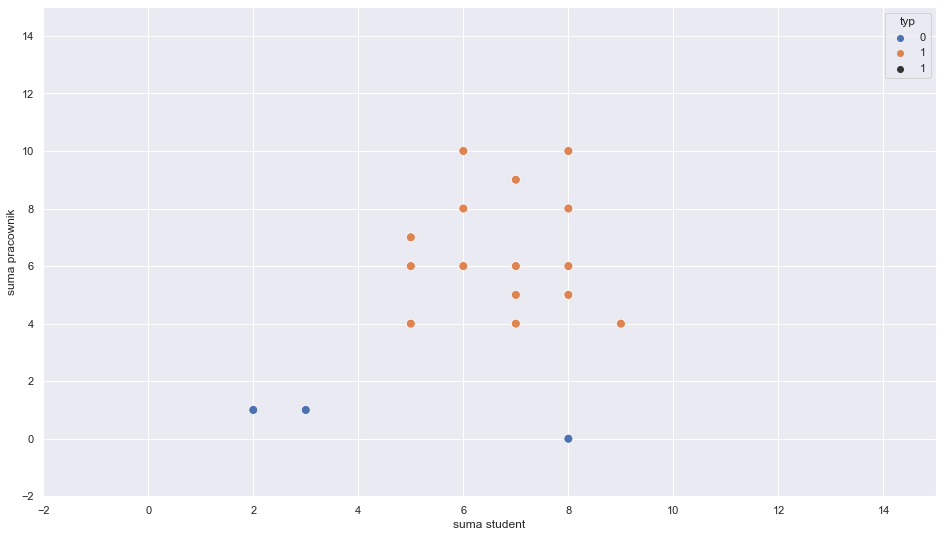

In [167]:
(sns.scatterplot(x='suma student', y='suma pracownik', hue='typ', data=x3, style=1, s=80))
plt.ylim(-2, 15)
plt.xlim(-2, 15)

(-2.0, 15.0)

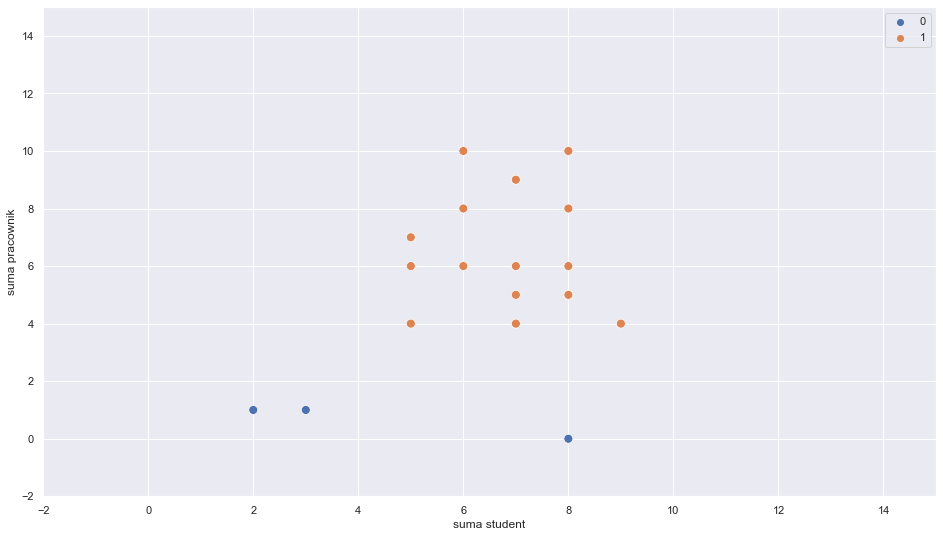

In [168]:
(sns.scatterplot(x='suma student', y='suma pracownik', hue=y_prediction, data=x3, style=1, s=80))
plt.ylim(-2, 15)
plt.xlim(-2, 15)

# Druga hipoteza

In [169]:
rozklad_tabela = dane_do_modelu.copy()

In [170]:
rozklad_tabela = rozklad_tabela[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
rozklad_tabela['wynik'] = rozklad_tabela.sum(axis=1)
rozklad_tabela

,2,3,4,5,6,7,8,9,10,11,wynik
0,1,1,0,0,1,1,1,1,1,1,8
1,1,1,0,0,1,0,0,0,1,0,4
2,1,1,0,0,0,0,1,0,1,1,5
3,1,1,1,0,1,0,1,1,1,1,8
4,1,1,1,0,1,0,1,1,1,1,8
5,0,1,1,0,1,1,1,1,1,1,8
6,1,1,1,0,0,1,1,1,1,1,8
7,1,1,1,1,1,0,1,1,1,1,9
8,1,1,1,0,1,0,1,1,1,1,8
9,0,1,1,0,0,0,1,1,1,1,6


<AxesSubplot:xlabel='wynik', ylabel='Count'>

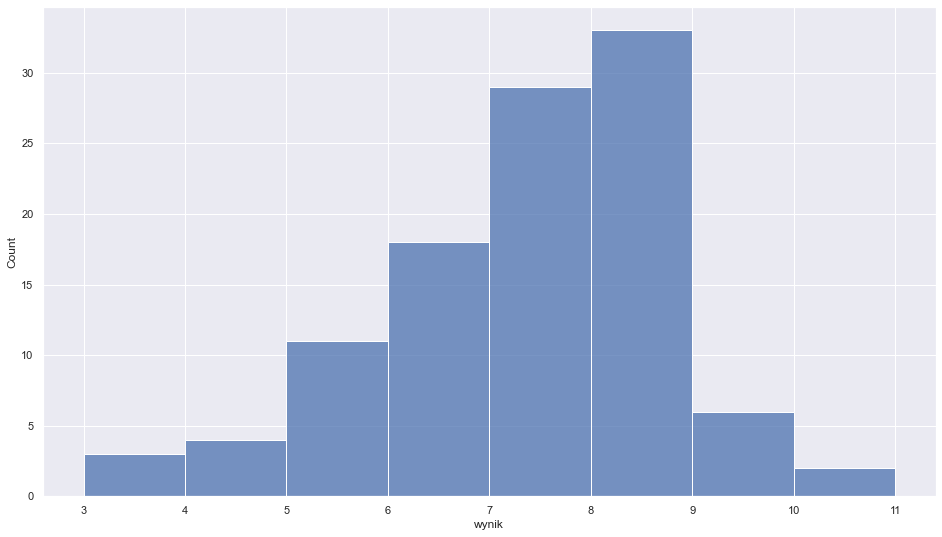

In [171]:
sns.histplot(data=rozklad_tabela, x='wynik', binwidth=0.99999)

In [172]:
loc, scale = stats.norm.fit(rozklad_tabela['wynik'])
n = stats.norm(loc=loc, scale=scale)
stats.kstest(rozklad_tabela['wynik'], n.cdf)

KstestResult(statistic=0.19434386255469221, pvalue=0.0005550781932513545)

In [173]:
rozklad_tabela[0] = dane[0]

In [174]:
sample1 = rozklad_tabela[rozklad_tabela[0] == 'student']['wynik'].values
sample2 = rozklad_tabela[rozklad_tabela[0] == 'pracownik instytutu']['wynik'].values

ranksums(sample1, sample2)

RanksumsResult(statistic=4.141182275556199, pvalue=3.455202411132958e-05)

In [175]:
k2, p = stats.normaltest(rozklad_tabela['wynik'])
p

0.03103518035041714